# Alpha Research

The goal in this project is to define a liquid universe of stocks where we would apply our factors into it to see through our factor analysis if there is a potential or not to send these results to [production](https://github.com/keyvantaj/Quantitative/blob/master/portfolio_management.ipynb). After selecting and combining factors using Machine Learning technics, the combined factor is analyzed and improved with an optimizer function to integrate our risk model.  

This project workflow is comprised of distinct stages including: 

1. Parameters
2. Universe definition
3. Sector definition
4. Alpha factors
5. Factor analysis
6. Factors combination
7. Risk analysis for equal weights
8. Integrating factor data to the optimizer
9. Optimized alpha vector analysis 
10. Predicted portfolio

In this context we have used different source of data provided from 
[Sharadar](https://www.quandl.com/publishers/sharadar) and 
[IFT](https://www.quandl.com/publishers/ift) as described below:

- Sharadar Equity Prices ([SHARADAR/SEP](https://www.quandl.com/databases/SEP/data))
Updated daily,End-Of-Day (EOD) price (ohlcv) data for more than 14,000 US public companies.  
- Indicator Descriptions ([SHARADAR/INDICATORS](https://www.quandl.com/databases/SF1/data))
Description of indicators listed in SF1 table for more than 14,000 US public companies.
- Tickers and Metadata ([SHARADAR/TICKERS](https://www.quandl.com/databases/SF1/data))
Information and metadata for more than 14,000 US public companies.
- Core US Fundamentals ([SHARADAR/SF1](https://www.quandl.com/databases/SF1/data))
 150 essential fundamental indicators and financial ratios, for more than 14,000 US public companies.
- Daily Metrics ([SHARADAR/DAILY](https://www.quandl.com/databases/SF1/data))
 5 essential metrics indicators and financial ratios daily updated, for more than 14,000 US public companies.
- Sentiment Analysis and News Analytics ([IFT/NSA](https://www.quandl.com/databases/NS1/data)) 
News, blogs, social media and proprietary sources for thousands of stocks.

### Tickers and Metadata [SHARADAR/TICKERS] features

- <b>table</b> : Sharadar Table : The database table which the ticker is featured in. Examples are: "SF1" or "SEP. 

- <b>permaticker</b> : Permanent Ticker Symbol : The permaticker is a unique and unchanging identifier for an issuer in the dataset which is issued by Sharadar. 

- <b>name</b> : Issuer Name : The name of the security issuer. 

- <b>exchange</b> : Stock Exchange : The exchange on which the security trades. Examples are: "NASDAQ";"NYSE";"NYSEARCA";"BATS";"OTC" and "NYSEMKT" (previously the American Stock exchange). 

- <b>isdelisted</b> : Is Delisted? : Is the security delisted? [Y]es or [N]o. 

- <b>category</b> : Issuer Category : The category of the issuer: "Domestic"; "Canadian" or "ADR". 

- <b>cusips</b> : CUSIPs : A security identifier. Space delimited in the event of multiple identifiers. 

- <b>siccode</b> : Standard Industrial Classification (SIC) Code : The Standard Industrial Classification (SIC) is a system for classifying industries by a four-digit code; as sourced from SEC filings. More on the SIC system here: https://en.wikipedia.org/wiki/Standard_Industrial_Classification  

- <b>sicsector</b> : SIC Sector : The SIC sector is based on the SIC code and the division tabled here: https://en.wikipedia.org/wiki/Standard_Industrial_Classification  

- <b>sicindustry</b> : SIC Industry : The SIC industry is based on the SIC code and the industry tabled here: https://www.sec.gov/info/edgar/siccodes.htm 

- <b>famasector</b> : Fama Sector : Not currently active - coming in a future update. 

- <b>famaindustry</b> : Fama Industry : Industry classifications based on the SIC code and classifications by Fama and French here: http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_48_ind_port.html 

- <b>sector</b> : Sector : Sharadar's sector classification based on SIC codes in a format which approximates to GICS. 

- <b>industry</b> : Industry : Sharadar's industry classification based on SIC codes in a format which approximates to GICS. 

- <b>scalemarketcap</b> : Company Scale - Market Cap : This field is experimental and subject to change. It categorises the company according to it's maximum observed market cap as follows: 1 - Nano < 50m; 2 - Micro < 300m; 3 - Small < 2bn; 4 - Mid < 10bn; 5 - Large < 200bn; 6 - Mega >= 200bn 

- <b>scalerevenue</b> : Company Scale - Revenue : This field is experimental and subject to change. It categorises the company according to it's maximum observed annual revenue as follows: 1 - Nano < 50m; 2 - Micro < 300m; 3 - Small < 2bn; 4 - Mid < 10bn; 5 - Large < 200bn; 6 - Mega >= 200bn 

- <b>relatedtickers</b> : Related Tickers : Where related tickers have been identified this field is populated. Related tickers can include the prior ticker before a ticker change; and it tickers for alternative share classes. 

- <b>currency</b> : Currency : The company functional reporting currency for the SF1 Fundamentals table or the currency for EOD prices in SEP and SFP. 

- <b>location</b> : Location : The company location as registered with the Securities and Exchange Commission. 

- <b>lastupdated</b> : Last Updated Date : Last Updated represents the last date that this database entry was updated; which is useful to users when updating their local records. 

- <b>firstadded</b> : First Added Date : The date that the ticker was first added to coverage in the dataset. 

- <b>firstpricedate</b> : First Price Date : The date of the first price observation for a given ticker. Can be used as a proxy for IPO date. Minimum value of 1986-01-01 for IPO's that occurred prior to this date. Note: this does not necessarily represent the first price date available in our datasets since our end of day price history currently starts in December 1998. 

- <b>lastpricedate</b> : Last Price Date : The most recent price observation available. 

- <b>firstquarter</b> : First Quarter : The first financial quarter available in the dataset. 

- <b>lastquarter</b> : Last Quarter : The last financial quarter available in the dataset. 

- <b>secfilings</b> : SEC Filings URL : The URL pointing to the SEC filings which also contains the Central Index Key (CIK). 

- <b>companysite</b> : Company Website URL : The URL pointing to the company website. 

### Core US Fundamentals [SHARADAR/SF1] features

- <b>accoci</b> : Accumulated Other Comprehensive Income : [Balance Sheet] A component of [Equity] representing the accumulated change in equity from transactions and other events and circumstances from non-owner sources; net of tax effect; at period end. Includes foreign currency translation items; certain pension adjustments; unrealized gains and losses on certain investments in debt and equity securities. 

- <b>assets</b> : Total Assets : [Balance Sheet] Sum of the carrying amounts as of the balance sheet date of all assets that are recognized. Major components are [CashnEq]; [Investments];[Intangibles]; [PPNENet];[TaxAssets] and [Receivables]. 

- <b>assetsc</b> : Current Assets : [Balance Sheet] The current portion of [Assets]; reported if a company operates a classified balance sheet that segments current and non-current assets. 

- <b>assetsnc</b> : Assets Non-Current : [Balance Sheet] Amount of non-current assets; for companies that operate a classified balance sheet. Calculated as the different between Total Assets [Assets] and Current Assets [AssetsC]. 

- <b>bvps</b> : Book Value per Share : [Metrics] Measures the ratio between [Equity] and [SharesWA] as adjusted by [ShareFactor]. 

- <b>capex</b> : Capital Expenditure : [Cash Flow Statement] A component of [NCFI] representing the net cash inflow (outflow) associated with the acquisition & disposal of long-lived; physical & intangible assets that are used in the normal conduct of business to produce goods and services and are not intended for resale. Includes cash inflows/outflows to pay for construction of self-constructed assets & software. 

- <b>cashneq</b> : Cash and Equivalents : [Balance Sheet] A component of [Assets] representing the amount of currency on hand as well as demand deposits with banks or financial institutions. 

- <b>cashnequsd</b> : Cash and Equivalents (USD) : [Balance Sheet] [CashnEq] in USD; converted by [FXUSD]. 

- <b>cor</b> : Cost of Revenue : [Income Statement] The aggregate cost of goods produced and sold and services rendered during the reporting period. 

- <b>consolinc</b> : Consolidated Income : [Income Statement] The portion of profit or loss for the period; net of income taxes; which is attributable to the consolidated entity; before the deduction of [NetIncNCI]. 

- <b>currentratio</b> : Current Ratio : [Metrics] The ratio between [AssetsC] and [LiabilitiesC]; for companies that operate a classified balance sheet. 

- <b>de</b> : Debt to Equity Ratio : [Metrics] Measures the ratio between [Liabilities] and [Equity]. 

- <b>debt</b> : Total Debt : [Balance Sheet] A component of [Liabilities] representing the total amount of current and non-current debt owed. Includes secured and unsecured bonds issued; commercial paper; notes payable; credit facilities; lines of credit; capital lease obligations; operating lease obligations; and convertible notes. 

- <b>debtc</b> : Debt Current : [Balance Sheet] The current portion of [Debt]; reported if the company operates a classified balance sheet that segments current and non-current liabilities. 

- <b>debtnc</b> : Debt Non-Current : [Balance Sheet] The non-current portion of [Debt] reported if the company operates a classified balance sheet that segments current and non-current liabilities. 

- <b>debtusd</b> : Total Debt (USD) : [Balance Sheet] [Debt] in USD; converted by [FXUSD]. 

- <b>deferredrev</b> : Deferred Revenue : [Balance Sheet] A component of [Liabilities] representing the carrying amount of consideration received or receivable on potential earnings that were not recognized as revenue; including sales; license fees; and royalties; but excluding interest income. 

- <b>depamor</b> : Depreciation Amortization & Accretion : [Cash Flow Statement] A component of operating cash flow representing the aggregate net amount of depreciation; amortization; and accretion recognized during an accounting period. As a non-cash item; the net amount is added back to net income when calculating cash provided by or used in operations using the indirect method. 

- <b>deposits</b> : Deposit Liabilities : [Balance Sheet] A component of [Liabilities] representing the total of all deposit liabilities held; including foreign and domestic; interest and noninterest bearing. May include demand deposits; saving deposits; Negotiable Order of Withdrawal and time deposits among others. 

- <b>divyield</b> : Dividend Yield : [Metrics] Dividend Yield measures the ratio between a company's [DPS] and its [Price]. 

- <b>dps</b> : Dividends per Basic Common Share : [Income Statement] Aggregate dividends declared during the period for each split-adjusted share of common stock outstanding. Includes spinoffs where identified. 

- <b>ebit</b> : Earning Before Interest & Taxes (EBIT) : [Income Statement] Earnings Before Interest and Tax is calculated by adding [TaxExp] and [IntExp] back to [NetInc]. 

- <b>ebitda</b> : Earnings Before Interest Taxes & Depreciation Amortization (EBITDA) : [Metrics] EBITDA is a non-GAAP accounting metric that is widely used when assessing the performance of companies; calculated by adding [DepAmor] back to [EBIT]. 

- <b>ebitdamargin</b> : EBITDA Margin : [Metrics] Measures the ratio between a company's [EBITDA] and [Revenue]. 

- <b>ebitdausd</b> : Earnings Before Interest Taxes & Depreciation Amortization (USD) : [Metrics] [EBITDA] in USD; converted by [FXUSD]. 

- <b>ebitusd</b> : Earning Before Interest & Taxes (USD) : [Income Statement] [EBIT] in USD; converted by [FXUSD]. 

- <b>ebt</b> : Earnings before Tax : [Metrics] Earnings Before Tax is calculated by adding [TaxExp] back to [NetInc]. 

- <b>eps</b> : Earnings per Basic Share : [Income Statement] Earnings per share as calculated and reported by the company. Approximates to the amount of [NetIncCmn] for the period per each [SharesWA] after adjusting for [ShareFactor]. 

- <b>epsdil</b> : Earnings per Diluted Share : [Income Statement] Earnings per diluted share as calculated and reported by the company. Approximates to the amount of [NetIncCmn] for the period per each [SharesWADil] after adjusting for [ShareFactor].. 

- <b>epsusd</b> : Earnings per Basic Share (USD) : [Income Statement] [EPS] in USD; converted by [FXUSD]. 

- <b>equity</b> : Shareholders Equity : [Balance Sheet] A principal component of the balance sheet; in addition to [Liabilities] and [Assets]; that represents the total of all stockholders' equity (deficit) items; net of receivables from officers; directors; owners; and affiliates of the entity which are attributable to the parent. 

- <b>equityusd</b> : Shareholders Equity (USD) : [Balance Sheet] [Equity] in USD; converted by [FXUSD]. 

- <b>ev</b> : Enterprise Value : [Metrics] Enterprise value is a measure of the value of a business as a whole; calculated as [MarketCap] plus [DebtUSD] minus [CashnEqUSD]. 

- <b>evebit</b> : Enterprise Value over EBIT : [Metrics] Measures the ratio between [EV] and [EBITUSD]. 

- <b>evebitda</b> : Enterprise Value over EBITDA : [Metrics] Measures the ratio between [EV] and [EBITDAUSD]. 

- <b>fcf</b> : Free Cash Flow : [Metrics] Free Cash Flow is a measure of financial performance calculated as [NCFO] minus [CapEx]. 

- <b>fcfps</b> : Free Cash Flow per Share : [Metrics] Free Cash Flow per Share is a valuation metric calculated by dividing [FCF] by [SharesWA] and [ShareFactor]. 

- <b>fxusd</b> : Foreign Currency to USD Exchange Rate : [Metrics] The exchange rate used for the conversion of foreign currency to USD for non-US companies that do not report in USD. 

- <b>gp</b> : Gross Profit : [Income Statement] Aggregate revenue [Revenue] less cost of revenue [CoR] directly attributable to the revenue generation activity. 

- <b>grossmargin</b> : Gross Margin : [Metrics] Gross Margin measures the ratio between a company's [GP] and [Revenue]. 

- <b>intangibles</b> : Goodwill and Intangible Assets : [Balance Sheet] A component of [Assets] representing the carrying amounts of all intangible assets and goodwill as of the balance sheet date; net of accumulated amortization and impairment charges. 

- <b>intexp</b> : Interest Expense : [Income Statement] Amount of the cost of borrowed funds accounted for as interest expense. 

- <b>invcap</b> : Invested Capital : [Metrics] Invested capital is an input into the calculation of [ROIC]; and is calculated as: [Debt] plus [Assets] minus [Intangibles] minus [CashnEq] minus [LiabilitiesC]. Please note this calculation method is subject to change. 

- <b>inventory</b> : Inventory : [Balance Sheet] A component of [Assets] representing the amount after valuation and reserves of inventory expected to be sold; or consumed within one year or operating cycle; if longer. 

- <b>investments</b> : Investments : [Balance Sheet] A component of [Assets] representing the total amount of marketable and non-marketable securties; loans receivable and other invested assets. 

- <b>investmentsc</b> : Investments Current : [Balance Sheet] The current portion of [Investments]; reported if the company operates a classified balance sheet that segments current and non-current assets. 

- <b>investmentsnc</b> : Investments Non-Current : [Balance Sheet] The non-current portion of [Investments]; reported if the company operates a classified balance sheet that segments current and non-current assets. 

- <b>liabilities</b> : Total Liabilities : [Balance Sheet] Sum of the carrying amounts as of the balance sheet date of all liabilities that are recognized. Principal components are [Debt]; [DeferredRev]; [Payables];[Deposits]; and [TaxLiabilities]. 

- <b>liabilitiesc</b> : Current Liabilities : [Balance Sheet] The current portion of [Liabilities]; reported if the company operates a classified balance sheet that segments current and non-current liabilities. 

- <b>liabilitiesnc</b> : Liabilities Non-Current : [Balance Sheet] The non-current portion of [Liabilities]; reported if the company operates a classified balance sheet that segments current and non-current liabilities. 

- <b>marketcap</b> : Market Capitalization : [Metrics] Represents the product of [SharesBas]; [Price] and [ShareFactor]. 

- <b>ncf</b> : Net Cash Flow / Change in Cash & Cash Equivalents : [Cash Flow Statement] Principal component of the cash flow statement representing the amount of increase (decrease) in cash and cash equivalents. Includes [NCFO]; investing [NCFI] and financing [NCFF] for continuing and discontinued operations; and the effect of exchange rate changes on cash [NCFX]. 

- <b>ncfbus</b> : Net Cash Flow - Business Acquisitions and Disposals : [Cash Flow Statement] A component of [NCFI] representing the net cash inflow (outflow) associated with the acquisition & disposal of businesses; joint-ventures; affiliates; and other named investments. 

- <b>ncfcommon</b> : Issuance (Purchase) of Equity Shares : [Cash Flow Statement] A component of [NCFF] representing the net cash inflow (outflow) from common equity changes. Includes additional capital contributions from share issuances and exercise of stock options; and outflow from share repurchases.  

- <b>ncfdebt</b> : Issuance (Repayment) of Debt Securities  : [Cash Flow Statement] A component of [NCFF] representing the net cash inflow (outflow) from issuance (repayment) of debt securities. 

- <b>ncfdiv</b> : Payment of Dividends & Other Cash Distributions    : [Cash Flow Statement] A component of [NCFF] representing dividends and dividend equivalents paid on common stock and restricted stock units. 

- <b>ncff</b> : Net Cash Flow from Financing : [Cash Flow Statement] A component of [NCF] representing the amount of cash inflow (outflow) from financing activities; from continuing and discontinued operations. Principal components of financing cash flow are: issuance (purchase) of equity shares; issuance (repayment) of debt securities; and payment of dividends & other cash distributions. 

- <b>ncfi</b> : Net Cash Flow from Investing : [Cash Flow Statement] A component of [NCF] representing the amount of cash inflow (outflow) from investing activities; from continuing and discontinued operations. Principal components of investing cash flow are: capital (expenditure) disposal of equipment [CapEx]; business (acquisitions) disposition [NCFBus] and investment (acquisition) disposal [NCFInv]. 

- <b>ncfinv</b> : Net Cash Flow - Investment Acquisitions and Disposals : [Cash Flow Statement] A component of [NCFI] representing the net cash inflow (outflow) associated with the acquisition & disposal of investments; including marketable securities and loan originations. 

- <b>ncfo</b> : Net Cash Flow from Operations : [Cash Flow Statement] A component of [NCF] representing the amount of cash inflow (outflow) from operating activities; from continuing and discontinued operations. 

- <b>ncfx</b> : Effect of Exchange Rate Changes on Cash  : [Cash Flow Statement] A component of Net Cash Flow [NCF] representing the amount of increase (decrease) from the effect of exchange rate changes on cash and cash equivalent balances held in foreign currencies. 

- <b>netinc</b> : Net Income : [Income Statement] The portion of profit or loss for the period; net of income taxes; which is attributable to the parent after the deduction of [NetIncNCI] from [ConsolInc]; and before the deduction of [PrefDivIS]. 

- <b>netinccmn</b> : Net Income Common Stock : [Income Statement] The amount of net income (loss) for the period due to common shareholders. Typically differs from [NetInc] to the parent entity due to the deduction of [PrefDivIS]. 

- <b>netinccmnusd</b> : Net Income Common Stock (USD) : [Income Statement] [NetIncCmn] in USD; converted by [FXUSD]. 

- <b>netincdis</b> : Net Loss Income from Discontinued Operations : [Income Statement] Amount of loss (income) from a disposal group; net of income tax; reported as a separate component of income. 

- <b>netincnci</b> : Net Income to Non-Controlling Interests : [Income Statement] The portion of income which is attributable to non-controlling interest shareholders; subtracted from [ConsolInc] in order to obtain [NetInc]. 

- <b>netmargin</b> : Profit Margin : [Metrics] Measures the ratio between a company's [NetIncCmn] and [Revenue]. 

- <b>opex</b> : Operating Expenses : [Income Statement] Operating expenses represents the total expenditure on [SGnA]; [RnD] and other operating expense items; it excludes [CoR]. 

- <b>opinc</b> : Operating Income : [Income Statement] Operating income is a measure of financial performance before the deduction of [IntExp]; [TaxExp] and other Non-Operating items. It is calculated as [GP] minus [OpEx]. 

- <b>payables</b> : Trade and Non-Trade Payables : [Balance Sheet] A component of [Liabilities] representing trade and non-trade payables. 

- <b>payoutratio</b> : Payout Ratio : [Metrics] The percentage of earnings paid as dividends to common stockholders. - Calculated by dividing [DPS] by [EPSUSD]. 

- <b>pb</b> : Price to Book Value : [Metrics] Measures the ratio between [MarketCap] and [EquityUSD]. 

- <b>pe</b> : Price Earnings (Damodaran Method) : [Metrics] Measures the ratio between [MarketCap] and [NetIncCmnUSD] 

- <b>pe1</b> : Price to Earnings Ratio : [Metrics] An alternative to [PE] representing the ratio between [Price] and [EPSUSD]. 

- <b>ppnenet</b> : Property Plant & Equipment Net : [Balance Sheet] A component of [Assets] representing the amount after accumulated depreciation; depletion and amortization of physical assets used in the normal conduct of business to produce goods and services and not intended for resale. Includes Operating Right of Use Assets. 

- <b>prefdivis</b> : Preferred Dividends Income Statement Impact : [Income Statement] Income statement item reflecting dividend payments to preferred stockholders. Subtracted from Net Income to Parent [NetInc] to obtain Net Income to Common Stockholders [NetIncCmn]. 

- <b>price</b> : Share Price (Adjusted Close) : [Entity] The price per common share adjusted for stock splits but not adjusted for dividends; used in the computation of [PE1]; [PS1]; [DivYield] and [SPS]. 

- <b>ps</b> : Price Sales (Damodaran Method) : [Metrics] Measures the ratio between [MarketCap] and [RevenueUSD]. 

- <b>ps1</b> : Price to Sales Ratio : [Metrics] An alternative calculation method to [PS]; that measures the ratio between a company's [Price] and it's [SPS]. 

- <b>receivables</b> : Trade and Non-Trade Receivables : [Balance Sheet] A component of [Assets] representing trade and non-trade receivables. 

- <b>retearn</b> : Accumulated Retained Earnings (Deficit) : [Balance Sheet] A component of [Equity] representing the cumulative amount of the entities undistributed earnings or deficit. May only be reported annually by certain companies; rather than quarterly. 

- <b>revenue</b> : Revenues : [Income Statement] Amount of Revenue recognized from goods sold; services rendered; insurance premiums; or other activities that constitute an earning process. Interest income for financial institutions is reported net of interest expense and provision for credit losses. 

- <b>revenueusd</b> : Revenues (USD) : [Income Statement] [Revenue] in USD; converted by [FXUSD]. 

- <b>rnd</b> : Research and Development Expense : [Income Statement] A component of [OpEx] representing the aggregate costs incurred in a planned search or critical investigation aimed at discovery of new knowledge with the hope that such knowledge will be useful in developing a new product or service. 

- <b>sbcomp</b> : Share Based Compensation : [Cash Flow Statement] A component of [NCFO] representing the total amount of noncash; equity-based employee remuneration. This may include the value of stock or unit options; amortization of restricted stock or units; and adjustment for officers' compensation. As noncash; this element is an add back when calculating net cash generated by operating activities using the indirect method. 

- <b>sgna</b> : Selling General and Administrative Expense : [Income Statement] A component of [OpEx] representing the aggregate total costs related to selling a firm's product and services; as well as all other general and administrative expenses. Direct selling expenses (for example; credit; warranty; and advertising) are expenses that can be directly linked to the sale of specific products. Indirect selling expenses are expenses that cannot be directly linked to the sale of specific products; for example telephone expenses; Internet; and postal charges. General and administrative expenses include salaries of non-sales personnel; rent; utilities; communication; etc. 

- <b>sharefactor</b> : Share Factor : [Entity] Share factor is a multiplicant in the calculation of [MarketCap] and is used to adjust for: American Depository Receipts (ADRs) that represent more or less than 1 underlying share; and; companies which have different earnings share for different share classes (eg Berkshire Hathaway - BRK.B). 

- <b>sharesbas</b> : Shares (Basic) : [Entity] The number of shares or other units outstanding of the entity's capital or common stock or other ownership interests; as stated on the cover of related periodic report (10-K/10-Q); after adjustment for stock splits. 

- <b>shareswa</b> : Weighted Average Shares : [Income Statement] The weighted average number of shares or units issued and outstanding that are used by the company to calculate [EPS]; determined based on the timing of issuance of shares or units in the period. 

- <b>shareswadil</b> : Weighted Average Shares Diluted : [Income Statement] The weighted average number of shares or units issued and outstanding that are used by the company to calculate [EPSDil]; determined based on the timing of issuance of shares or units in the period. 

- <b>sps</b> : Sales per Share : [Metrics] Sales per Share measures the ratio between [RevenueUSD] and [SharesWA] as adjusted by [ShareFactor]. 

- <b>tangibles</b> : Tangible Asset Value : [Metrics] The value of tangibles assets calculated as the difference between [Assets] and [Intangibles]. 

- <b>taxassets</b> : Tax Assets : [Balance Sheet] A component of [Assets] representing tax assets and receivables. 

- <b>taxexp</b> : Income Tax Expense : [Income Statement] Amount of current income tax expense (benefit) and deferred income tax expense (benefit) pertaining to continuing operations. 

- <b>taxliabilities</b> : Tax Liabilities : [Balance Sheet] A component of [Liabilities] representing outstanding tax liabilities. 

- <b>tbvps</b> : Tangible Assets Book Value per Share : [Metrics] Measures the ratio between [Tangibles] and [SharesWA] as adjusted by [ShareFactor]. 

- <b>workingcapital</b> : Working Capital : [Metrics] Working capital measures the difference between [AssetsC] and [LiabilitiesC]. 

- <b>roe</b>: Return on Average Equity : [Metrics] Return on equity measures a corporation's profitability by calculating the amount of [NetIncCmn] returned as a percentage of [EquityAvg]. 

- <b>roa</b> : Return on Average Assets : [Metrics] Return on assets measures how profitable a company is [NetIncCmn] relative to its total assets [AssetsAvg].

### Sharadar Equity Prices [SHARADAR/SEP] features

- <b>open</b> : Open Price - Split Adjusted : The opening share price, adjusted for stock splits and stock dividends. 
- <b>high</b> : High Price - Split Adjusted : The high share price, adjusted for stock splits and stock dividends. 
- <b>low</b> : Low Price - Split Adjusted : The low share price, adjusted for stock splits and stock dividends. 
- <b>close</b> : Close Price - Split Adjusted : The open share closing, adjusted for stock splits and stock dividends. 
- <b>volume</b> : Volume - Split Adjusted : The traded volume, adjusted for stock splits and stock dividends.

### Daily Metrics ([SHARADAR/DAILY] features

- <b>ev</b> : Enterprise Value - Daily : Enterprise value is a measure of the value of a business as a whole; calculated as [MarketCap] plus [DebtUSD] minus [CashnEqUSD]. [MarketCap] is calculated by us, and the remaining figures are sourced from the most recent SEC form 10 filings. 
- <b>evebit</b> : Enterprise Value over EBIT - Daily : Measures the ratio between [EV] and [EBITUSD]. EBITUSD is derived from the most recent SEC form 10 filings. 
- <b>evebitda</b> : Enterprise Value over EBITDA - Daily : Measures the ratio between [EV] and [EBITDAUSD]. EBITDAUSD is derived from the most recent SEC form 10 filings. 
- <b>marketcap</b> : Market Capitalization - Daily : Represents the product of [SharesBas]; [Price] and [ShareFactor]. [SharesBas] is sourced from the most recent SEC form 10 filing. 
- <b>pb</b> : Price to Book Value - Daily : Measures the ratio between [MarketCap] and [EquityUSD]. [EquityUSD] is sourced from the most recent SEC form 10 filing. 
- <b>pe</b> : Price Earnings (Damodaran Method) - Daily : Measures the ratio between [MarketCap] and [NetIncCmnUSD]. [NetIncCmnUSD] is sourced from the most recent SEC form 10 filings. 
- <b>ps</b> : Price Sales (Damodaran Method) - Daily : Measures the ratio between [MarketCap] and [RevenueUSD]. [RevenueUSD] is sourced from the most recent SEC form 10 filings. 

### Sentiment Analysis and News Analytics ([IFT/NSA] features

- <b>sentiment Score</b>: a numeric measure of the bullishness / bearishness of news coverage of the stock.
- <b>sentiment_high</b>: highest intraday sentiment scores.
- <b>sentiment_low</b>: lowest intraday sentiment scores.
- <b>news_volume</b>: the absolute number of news articles covering the stock.
- <b>news_buzz</b>: a numeric measure of the change in coverage volume for the stock.

In [1]:
# outsource packages
import pyfolio as pf
import alphalens as al
import zipfile
import os
import alphalens as al
import quandl
import matplotlib.pyplot as plt
import datetime as datetime
import pandas as pd
import numpy as np
import talib
import seaborn as sns
from time import time,sleep
from sklearn import preprocessing
import pytz
import itertools
import warnings

warnings.filterwarnings("ignore")
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import yfinance as yf
yf.pdr_override()

In [2]:
# local packages
from modules import FactorManagement as FM
from modules import RiskManagement as RM
from modules import Learner as LE
from modules import OptimalHoldingsRegularization as OHR
from modules import Util as UT

In [3]:
secret_key = pd.read_csv('secret_key.txt',header=None)
quandl.ApiConfig.api_key = secret_key[0][0]

# 1 - Parameters

Before diving into factor research and quantitative analysis, we have to define parameters that will be used in different stages of this project. The purpose is to try different parameters to optimize our output portfolio during the time. The first parameter we set here below is `update_data` that is used to decide if we want to update the data or not.

In [4]:
update_data = True
if update_data:
    print ('ready to update data')
else:
    print ('data is already updated') 

ready to update data


## 1 - 1 - Time series data parameters

In this part, we set date parameters which are used for calling data from Quandl API. In this context, we call SEP/SHARADAR, DAILY/SHARADAR, and IFT/NSA for three years of data and SF1/SHARADAR for four years. The reason for this slicing is related to our final factor data where we look back one year. For example, some factors window length is set to one year, which means we need to load a minimum of three years data to chunk the final data frame in one year slice.

In [5]:
tod = datetime.datetime.today().date()
print ('current date: {}'.format(tod))

current date: 2020-08-30


In [6]:
# SF1
some_years = str(tod.year - 4)
month = str(tod.month)
day = str(tod.day)
start_f = '{}-{}-{}'.format(some_years,month,day)
print ('SF1 data starting date: {}'.format(start_f))

SF1 data starting date: 2016-8-30


In [7]:
# SEP & daily
two_years = str(tod.year - 3)
month = str(tod.month)
day = str(tod.day)
start_sep = '{}-{}-{}'.format(two_years,month,day)
print ('SEP,Daily and Sentiment data starting date: {}'.format(start_sep))

SEP,Daily and Sentiment data starting date: 2017-8-30


## 1 - 2 - Factor data period parameters

We set our final date parameter to one year factor data. The reason is that we believe more than one-year factor analysis will decrease our efficiency in prediction and could affect our interpretation of results.

In [8]:
# Slicing data for 1y
years_to_slice = 1
year = str(tod.year - years_to_slice)
month = str(tod.month)
day = str(tod.day)
ayear = '{}-{}-{}'.format(year,month,day)

start = ayear
end = str(tod)
print ('Final slicing date for {} year: {}'.format(years_to_slice,ayear))

Final slicing date for 1 year: 2019-8-30


## 1 - 3 - Universe parameters

The universe definition is an important step in this project. These parameters set here below will impact our analysis and need to be tuned as well as other parameters. metadata parameters are composed of `cap_select`, `exchange_select`, `currency_select` and `delisted_select` which are used to define our fisrt universe of stocks. For the second universe, `filteration_number` represents the number of liquid securities selected by dollar volume function and `smoothing_universe_period` represents the moving average window length in dollar volume function to select liquid securities smoothed over time. The following parameters are selected from the following values:

#### Market Cap:

- 1 - Nano
- 2 - Micro 
- 3 - Small 
- 4 - Mid 
- 5 - Large 
- 6 - Mega

#### Exhcange:

- NASDAQ 
- NYSE
- BATS
- NYSEARCA
- NYSEMKT
- OTC

#### Currency:

USD, EUR, ARS, AUD, BRL, CAD, CHF, CLP, <br>
CNY, COP, DKK, GBP, HKD, IDR, ILS, INR, <br>
JPY, KRW, MXN, MYR, NOK, NZD, PEN,PHP, <br>
PLN, RUB, SEK, TRY, TWD, ZAR

#### Delisted:

'Y' or 'N'

In [9]:
# metadata parameters
cap_select = ['6 - Mega', '5 - Large', '4 - Mid', '3 - Small']
exchange_select = ['NYSE','NASDAQ']
currency_select = ['USD']
delisted_select = ['N']

In [10]:
# dollar volume parameters
filteration_number  = 700
smoothing_universe_period = 120

## 1 - 4 - Pipeline parameters

Creating factor data in a different way to obtain significant results is a critical subject treated in this project. The goal is to tune up the factor parameter to get optimal results. This section lets us test different parameters for these factors and navigates over different factor data. `smoothed_value` is the window length moving average parameter used to remove the noise created by factor variation. We will discuss other parameters in the factors section. 

In [11]:
smoothed_value = 5

In [12]:
fundamental_in = ['ncf']
momentum_in = {'momentum_252d':252,'momentum_120d':120 }
sma_in = {'sma200':200, 'sma100':100, 'sma50':50}
daily_in = {'marketcap':120, 'evebitda':100, 'ps':100, 'pe':100, 'pb':100}
over_in = {'overnight_sentiment_5d':5}
direction_in = {'direction_100d':100}
sent_in = {'sentiment_100d':100,'sentiment_60d':60}
vol_in = {'volatility_5d':5,'volatility_20d':20}
capm_in = {'capm_60d':60,'capm_20d':20,'capm_10d':10,'capm_5d':5}

## 1 - 5 - Factor analysis parameters

Here below we select periods to analyze our multi-factor output. These periods are selected according to our trading strategy and portfolio management methods. The `rebalance_period` is also an important parameter to choose carefully and consider commission fees in our portfolio management system. 

We use [Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) in our risk management model to reduce the dimensionality of the risk factors. `factor exposures` parameter is the dimension that we want to reduce to it.

In [13]:
combined_periods = (5,10,20)
rebalance_period = 10

In [14]:
# Risk analysis
factor_exposures = 13

## 1 - 6 - Optimizer parameters

After combining factors we put it into the optimizer function which will maximize alpha factor and consider our risk model in counterpart. `risk_cap` is used to set the risk exposure parameter. More the risk is and more the alpha will be. `lambda_reg` is used regularized our optimized function. it is operating like a portfolio enhancer.

In [15]:
risk_cap = 0.05
lambda_reg = 0.5
factor_max = 10
factor_min = -10 
weights_max = 0.1
weights_min = -0.1

In [16]:
assert risk_cap < 0.5
assert lambda_reg < 1

## 1 - 7 - Sector parameters

Our factor data is preprocessed and grouped by sector. Here below we can select sectors to drop, `sec_to_drop` regrouped sectors to not appear in factor data and our analysis to avoid sectors which have poor results. We also have the choice to drop specific sectors from long universe or short universe. For example the Tehnology sector shows good results in long qunatile and poor results in short quantile, it would be interesting to add this sector to `drop_short_sec`. The following parameter is selected from the following values:

#### Sectors:

- Basic Materials
- Communication Services
- Consumer Cyclical
- Consumer Defensive
- Energy
- Financial Services
- Healthcare
- Industrials
- Real Estate
- Technology
- Utilities
- None

In [17]:
sec_to_drop = ['Communication Services']

In [18]:
drop_long_sec = []
drop_short_sec = []

In [19]:
assert set(sec_to_drop) & set(drop_long_sec) == set()
assert set(sec_to_drop) & set(drop_short_sec) == set()
assert set(drop_long_sec) & set(drop_short_sec) == set()

## 1 - 9 - Quantiles

Here after the quantiles parameters are defining the equal portions of datas to be analyzed and considered for the future portfolio. `quantile_portions` is the number of qunatiles we want to analyze and work with. In the other hand `quantile_to_analysis` is the quantiles selected for the final analyze and portfolio. We use to select extremety quantiles to get the best results. 

In [20]:
qunatile_portions = 25
quantile_to_analyse = [1,qunatile_portions]

# 2 - Universe definition

In this project, the universe is defined as a group of assets having high liquidy over a period. This universe will be used to compare systematic factors. Before proceeding to the selection of stocks we use `get_table` from Quandl API to load metadata of all stocks.

In the next step, we use our universe parameters to select the fisrt universe of stocks. The criteria for this selection are as followed:

- Exchange
- Market cap
- Currency
- Delisted

The following codes are used to define the first universe described above.

## 2 - 1 - Metadata

In [21]:
meta = quandl.get_table('SHARADAR/TICKERS', table='SF1',paginate=True)
meta.set_index('ticker',inplace=True, drop=True)

## 2 - 1 - 1 - First universe

In [22]:
if exchange_select:
    exchange = []
    for i in exchange_select:
        exchange.append(list(meta[(meta['exchange'] == i)].index))
    meta_ex = meta.loc[list(itertools.chain.from_iterable(exchange))]
else:
    meta_ex = meta

if currency_select:
    currency = []
    for i in currency_select:
        currency.append(list(meta_ex[(meta_ex['currency'] == i)].index))
    meta_ex_cu = meta_ex.loc[list(itertools.chain.from_iterable(currency))]
else:
    meta_ex_cu = meta_ex

if delisted_select:
    delisted = []
    for i in delisted_select:
        delisted.append(list(meta_ex_cu[(meta_ex_cu['isdelisted'] == i)].index))
    meta_ex_cu_de = meta_ex_cu.loc[list(itertools.chain.from_iterable(delisted))]
else:
    meta_ex_cu_de = meta_ex_cu
    
if cap_select:    
    cap = []
    for i in cap_select:
        cap.append(list(meta_ex_cu_de[(meta_ex_cu_de['scalemarketcap'] == i)].index))
    meta_ex_cu_de_cap = meta_ex_cu_de.loc[list(itertools.chain.from_iterable(cap))]
else:
    meta_ex_cu_de_cap = meta_ex_cu_de

In [23]:
u1 = list(meta_ex_cu_de_cap.index)

In [24]:
print ('{} assets selected in first selection'.format(len(u1)))

3508 assets selected in first selection


## 2 - 2 - OHLCV data

Once the `first_universe` is defined, we use it to get SHARADAR/SEP data and store this table as a zip file on the local drive. This table gives us the ohlcv data started at `start_sep` defined in the parameters section and ended at the current date `tod`. The zip file is extracted, sorted into a multi-index data frame, and finally cleaned using our local function `cleaning_dataframe` imported from `utils_s.py`.

In [25]:
if update_data:
    quandl.export_table('SHARADAR/SEP',
                        ticker = u1, 
                        date = {'gte': start_sep, 'lte': str(end)}, 
                        filename = 'data/ohlcv.zip')

We are generating the zip file now, please wait...
We are generating the zip file now, please wait...
We are generating the zip file now, please wait...
We are generating the zip file now, please wait...
data/ohlcv.zip


In [26]:
with zipfile.ZipFile('data/ohlcv.zip', 'r') as zip_ref:
    zip_ref.extractall()

for item in os.listdir(os.getcwd()):  # loop through items in dir
    if item.endswith('.csv') and item.split('_')[0] == 'SHARADAR' and item.split('_')[1] == 'SEP':
        
        ohlcv = pd.read_csv(item)
        ohlcv['date'] = pd.to_datetime(ohlcv['date'])
        ohlcv = ohlcv.set_index(['date', 'ticker']).sort_index(level=[0,1], ascending=[True, False])
        ohlcv.drop(['lastupdated','dividends','closeunadj'],axis=1,inplace=True)

        os.remove(item)

cleaning data
columns are clean


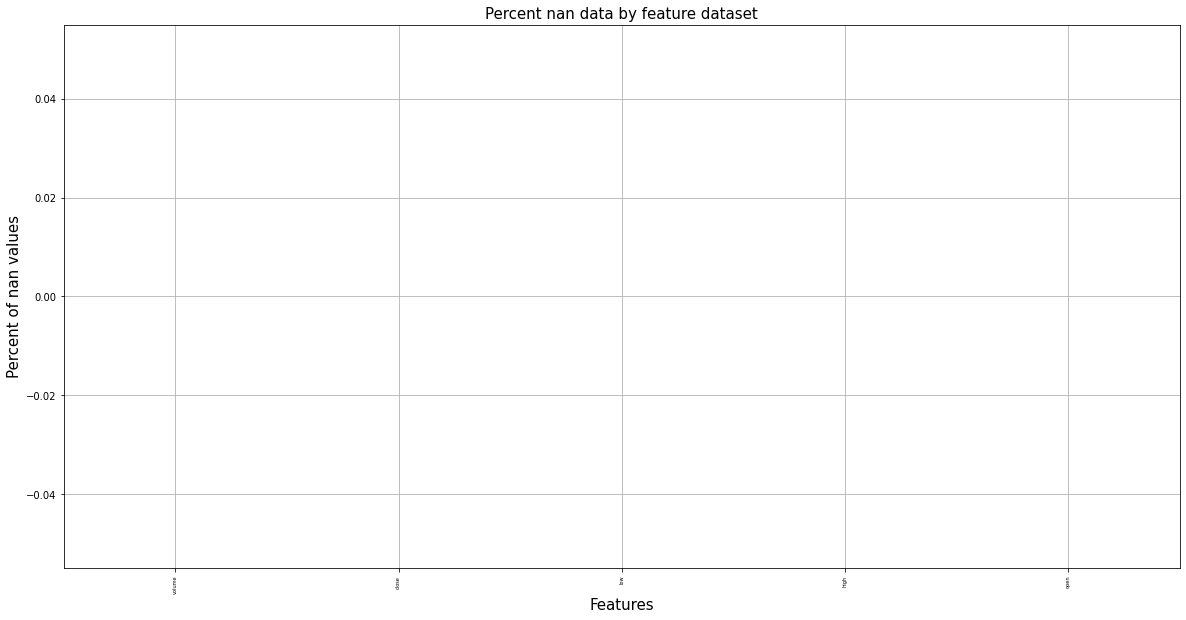

The percentage of dropped columns is 0%.
Dropped 0 columns out of 5


In [27]:
ohlcv = UT.cleaning_dataframe(df = ohlcv,
                              pernan_to_drop = 0.2)

## 2 - 2 - 1 - Second universe

In this section, the `dollar_volume_universe` attends to select liquid stocks with significant market cap. In this context, the close frame is multiplied to volume to obtain the market cap data frame. Then we sort assets having the highest market cap. the number of assets selected is set in the parameters section through `filteration_number` and smoothed over time with `smoothing_universe_period`.

In [28]:
def dollar_volume_universe(tickers_num, ohlcv, sma_period):
    
    ohlcv['dollar_volume'] = ohlcv['close']*ohlcv['volume']
    dollar_vol = ohlcv['dollar_volume'].unstack('ticker')
    sma = pd.DataFrame(index = dollar_vol.index)
    try:
        for tick in dollar_vol.columns:
            sma[tick] = talib.SMA(dollar_vol[tick].values, timeperiod=sma_period)
    except:
        pass
    
    last = sma.iloc[-1,:]
    dol = pd.DataFrame(data = last.values,index = last.index, columns = ['dv'])
    dol.dropna(inplace = True)
    
    return list(dol.sort_values(by='dv', ascending=False).iloc[:tickers_num].index)    

In [29]:
universe = dollar_volume_universe(tickers_num = filteration_number, ohlcv = ohlcv, sma_period = smoothing_universe_period)

In [30]:
print ('{} assets selected out of {} for the second selection'.format(len(universe),len(u1)))

700 assets selected out of 3508 for the second selection


In [31]:
assert len(universe) == filteration_number

## 2 - 2 - 2 - Third universe

A sector selection model is a systematic tool that tilts a portfolio towards sectors that are predicted to outperform and underweights those that are predicted to underperform. If the process can effectively discern winning/losing industry groups, it can enhance the value added from a stock-selection methodology. Here below we use `sec_to_drop` which is composed of sectors to not include in the final assets (third universe). the output of this function will be the final selection.

In [32]:
universe_sectors = pd.DataFrame(index=universe, columns=['sectors'])
for i in universe:
    try:
        universe_sectors.loc[i] = meta_ex_cu_de_cap.loc[i]['sector']
    except:
        universe_sectors.loc[i] = np.nan
    try:
        for sec in sec_to_drop:
            if meta_ex_cu_de_cap.loc[i]['sector'] == sec:
                universe_sectors.drop(i, axis=0,inplace=True)
    except:
        pass

In [33]:
universe = list(universe_sectors.index)

In [34]:
print ('{} assets selected after sector cleaning out of {} for the third selection'.format(len(universe),len(u1)))

693 assets selected after sector cleaning out of 3508 for the third selection


## 2 - 3 - Benchmark

Before starting to define the universe, we have to prepare the benchmark. For this project the <b>S&P500</b> will be the reference index and we will use this data for our factor analysis.

In [35]:
# input
market = '^GSPC'
# read data 
dfm = yf.download(market,ohlcv.index.levels[0][0],ohlcv.index.levels[0][-1] + pd.Timedelta(days=1))

[*********************100%***********************]  1 of 1 completed


In [36]:
dfm = dfm.rename(columns={'Open': 'open', 
                          'High': 'high', 
                          'Low':'low', 
                          'Close':'close',
                          'Volume':'volume'}).drop('Adj Close', axis=1)
dfm.index.name = 'date'
# return
benchmark = dfm['close'].pct_change().loc[slice(start,end)]
benchmark.index = benchmark.index.tz_localize('UTC')

In [37]:
benchmark.head()

date
2019-08-30 00:00:00+00:00    0.000643
2019-09-03 00:00:00+00:00   -0.006899
2019-09-04 00:00:00+00:00    0.010842
2019-09-05 00:00:00+00:00    0.013010
2019-09-06 00:00:00+00:00    0.000911
Name: close, dtype: float64

In [38]:
len(universe)

693

## 2 - 4 - Fundamental data

After defining the final `universe`, we get fundamental SHARADAR/SF1 data and store this table as a zip file on the local drive. This table gives us the fundamental data of Most Recent Quarter (MRQ) Reported started at `start_f` defined in the parameters section and ended at the current date `tod`. The zip file is extracted, sorted into a multi-index data frame, and finally cleaned using our local function `cleaning_dataframe` imported from `utils_s.py`.

In [39]:
if update_data:
    #qopts={"columns":ind}
    quandl.export_table('SHARADAR/SF1',
                        ticker=universe, 
                        dimension = 'MRQ', 
                        calendardate={'gte':start_f,'lte':str(tod)}, 
                        filename='data/fundamental.zip')

We are generating the zip file now, please wait...
data/fundamental.zip


In [40]:
with zipfile.ZipFile('data/fundamental.zip', 'r') as zip_ref:
    zip_ref.extractall()

for item in os.listdir(os.getcwd()):  # loop through items in dir
    
    if item.endswith('.csv') and item.split('_')[0] == 'SHARADAR' and item.split('_')[1] == 'SF1':
        sf1 = pd.read_csv(item)
        sf1 = sf1.set_index(['calendardate', 'ticker']).sort_index(level=[0,1], ascending=[True, False])
        sf1.drop(['datekey','reportperiod','lastupdated','dimension'],axis=1,inplace=True)
        os.remove(item)  

cleaning data
columns are clean


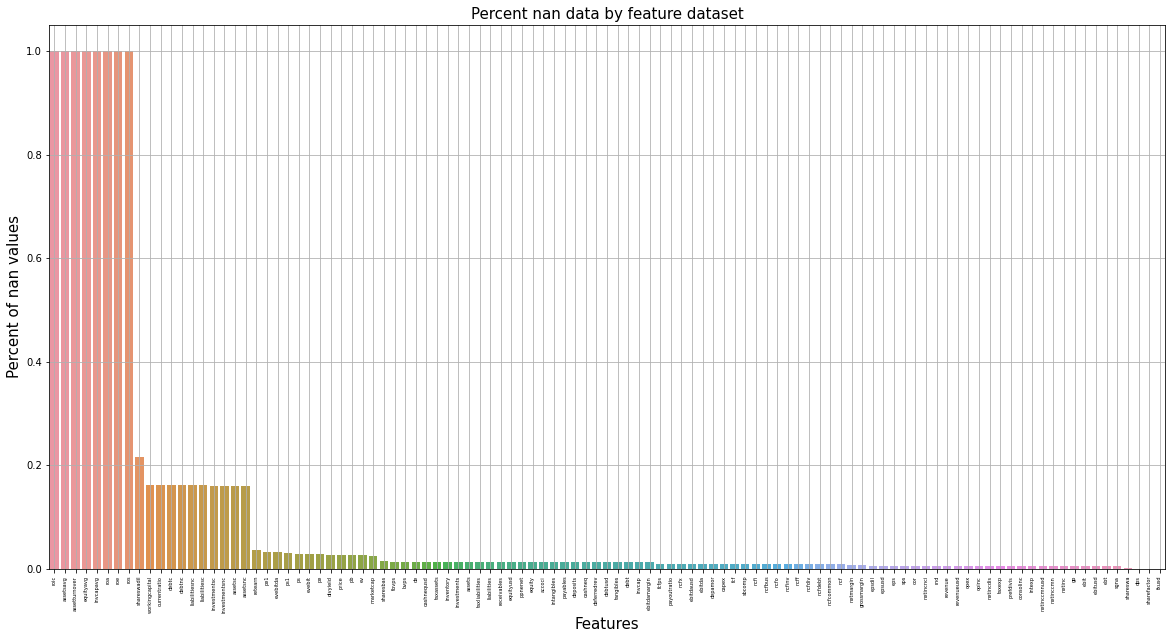

The percentage of dropped columns is 8%.
Dropped 9 columns out of 105


In [41]:
sf1 = UT.cleaning_dataframe(sf1,0.2)

In [42]:
sf1['roe'] = sf1['netinc'] / sf1['equity']
sf1['roa'] = sf1['netinc'] / sf1['assets']

## 2 - 5 - Daily metrics data

We continue to download data, here get daily metrics SHARADAR/DAILY data and store this table as a zip file on the local drive. This table gives us the data that with discussed in previously started at `start_sep` defined in the parameters section and ended at the current date `tod`. The zip file is extracted, sorted into a multi-index data frame, and finally cleaned using our local function `cleaning_dataframe` imported from `utils_s.py`.

In [43]:
if update_data:
    quandl.export_table('SHARADAR/DAILY',
                        ticker=universe, 
                        date={'gte': start_sep, 'lte': str(tod)}, 
                        filename='data/daily.zip')

We are generating the zip file now, please wait...
data/daily.zip


In [44]:
with zipfile.ZipFile('data/daily.zip', 'r') as zip_ref:
    zip_ref.extractall()

for item in os.listdir(os.getcwd()):  # loop through items in dir
    
    if item.endswith('.csv') and item.split('_')[0] == 'SHARADAR' and item.split('_')[1] == 'DAILY':
        daily = pd.read_csv(item)
        daily['date'] = pd.to_datetime(daily['date'])
        daily = daily.set_index(['date', 'ticker']).sort_index(level=[0,1], ascending=[True, False])
        daily.drop(['lastupdated'],axis=1,inplace=True)
        os.remove(item) 

cleaning data
columns are clean


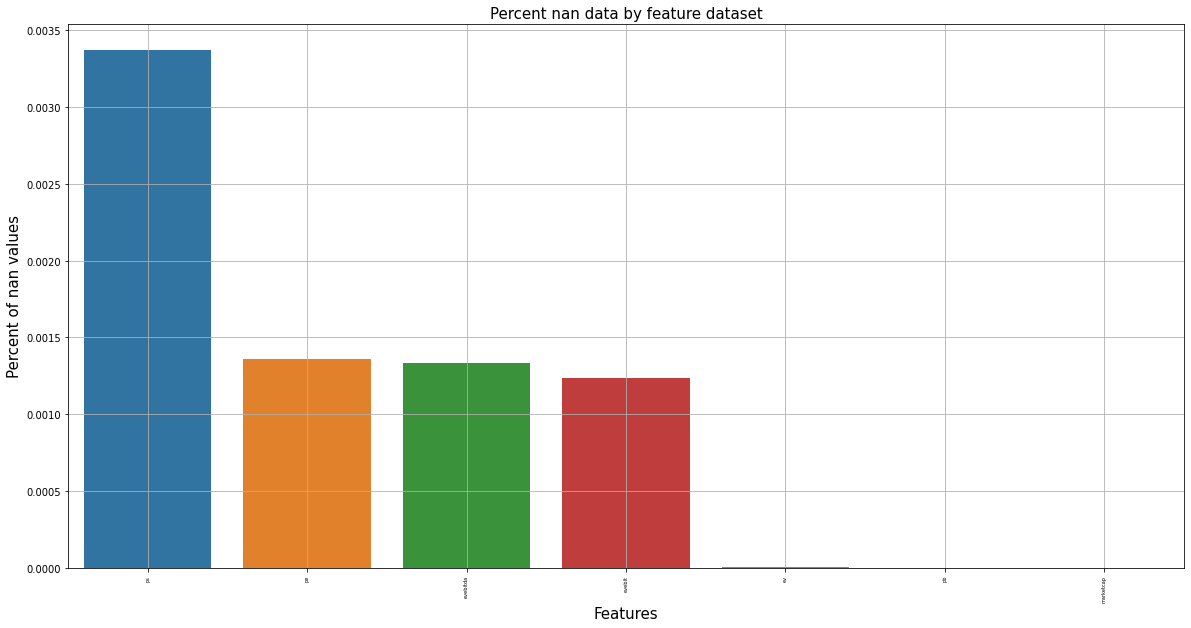

The percentage of dropped columns is 0%.
Dropped 0 columns out of 7


In [45]:
daily = UT.cleaning_dataframe(daily,0.2)

## 2 - 6 - Sentiment data

The last data we get is sentiment data IFT/NSA data and store this table as a zip file on the local drive. This table gives us the data that discussed previously started at `start_sep` defined in the parameters section and ended at the current date `tod`. The zip file is extracted, sorted into a multi-index data frame, and finally cleaned using our local function `cleaning_dataframe` imported from `utils_s.py`.

In [46]:
if update_data:
    quandl.export_table('IFT/NSA',
                        ticker=universe, 
                        date={'gte': start_sep, 'lte': str(end)}, 
                        filename='data/sent_test.zip')

We are generating the zip file now, please wait...
We are generating the zip file now, please wait...
We are generating the zip file now, please wait...
data/sent_test.zip


In [47]:
with zipfile.ZipFile('data/sent.zip', 'r') as zip_ref:
    zip_ref.extractall()

for item in os.listdir(os.getcwd()):  # loop through items in dir
    
    if item.endswith('.csv') and item.split('_')[0] == 'IFT' and item.split('_')[1] == 'NSA':
        sent = pd.read_csv(item)
        sent['date'] = pd.to_datetime(sent['date'])
        sent = sent.set_index(['date', 'ticker']).sort_index(level=[0,1], ascending=[True, False])
        sent = sent[sent['exchange_cd']=='US']
        sent.drop(['name','exchange_cd'],axis=1,inplace=True)
        os.remove(item) 

cleaning data
columns are clean


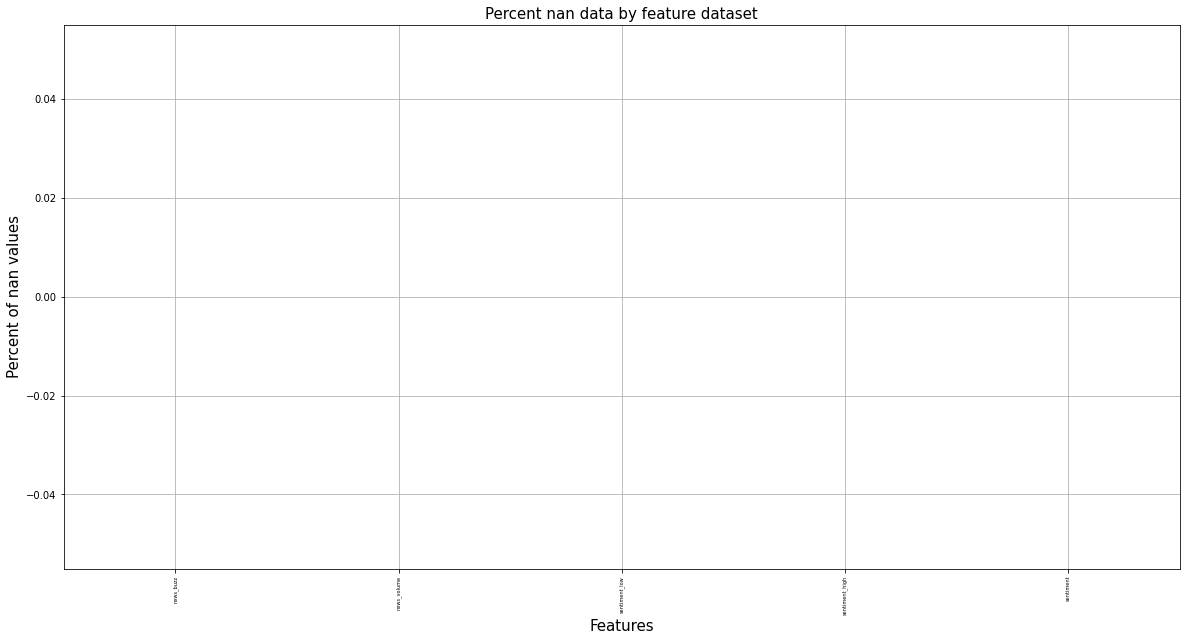

The percentage of dropped columns is 0%.
Dropped 0 columns out of 5


In [48]:
sent = UT.cleaning_dataframe(sent,0.2)

# 3 - Universe intersection

All the data is collected and stacked separately into a multi-index data frame. However, some of the assets defined previously in the universe section are dropped or not collected during the download and cleaning process. Therefore, the goal in this section is to get the intersection of assets represented for each data frame (`sent`,`sf1`,`daily` and `ohlcv`).

In [49]:
new_universe =list(set(sent['sentiment'].unstack('ticker').columns) & set(sf1.index.levels[1]) & set(daily.index.levels[1]) & set(ohlcv.index.levels[1]))

In [50]:
print ('{} assets dropped after intersectioning'.format((len(universe) - len(new_universe))))
print ('{} assets are loaded'.format(len(new_universe)))

324 assets dropped after intersectioning
369 assets are loaded


## 3 - 1- Sectors

The sectors represented in the cleaned data are as followed:

In [51]:
meta_cleaned = meta_ex_cu_de_cap.loc[new_universe,:]
print ('Sectors in cleaned data: \n')
sectors = {}
for i in set(meta_cleaned['sector']):
    print (' ',i)
    sectors[i] = list(meta_cleaned[meta_cleaned['sector'] == i].index)

Sectors in cleaned data: 

  Consumer Cyclical
  Healthcare
  Basic Materials
  Energy
  Industrials
  Real Estate
  Utilities
  Financial Services
  Technology
  Consumer Defensive


# 4 - Alpha factors

Factor-driven alpha investment strategies, designed to delivering market-beating returns, come in a number of different forms. In this porject, the following alpha factors are discussed:

- Daily Metrics
- Simple Moving Average
- Overnight Sentiment
- Mean Reversion
- Direction
- Sentiment Analysis
- Volatility
- Capm
- Fundamentals

## 4 - 1 - Factorizing

These factors are generated as followed:

1 - Formulation <br>
2 - Scaling <br>
3 - Smoothing <br>
4 - Slicing <br>
5 - Neutralizing by Sector <br>
6 - Scaling <br>

Each of these factors of stored into a dictionary to be fetch into a final multiindex dataframe `all_factors` as the ouput of our pipleline. Once this is done, the multiindex data frame will be used as the input of other functions for analysis and optimization etc.

In [52]:
close = ohlcv['close'].unstack('ticker')[new_universe]
openn = ohlcv['open'].unstack('ticker')[new_universe]
high = ohlcv['high'].unstack('ticker')[new_universe]
low = ohlcv['low'].unstack('ticker')[new_universe]

In [53]:
pricing = openn.loc[slice(start,end),:].tz_localize('UTC')[new_universe]

### 4 - 1 - 1 - Daily Metrics

In [54]:
daily_data = {}

for i in daily_in.keys():
    
    df_daily = daily[i].unstack('ticker')
    # formulation and scaling
    reversion = FM().momentum(df_daily,daily_in[i])*-1
    # smoothing
    smoothed_reversion = FM().smooth(reversion,smoothed_value)
    # slicing
    smoothed_reversion.index = pd.to_datetime(smoothed_reversion.index)
    smoothed_reversion = smoothed_reversion.loc[slice(start,end),:]
    # neutralizing and scaling
    smoothed_reversion_neutralized_scaled = FM().sector_neutral(sectors, smoothed_reversion)

    
    daily_data[i] = smoothed_reversion_neutralized_scaled[new_universe]


### 4 - 1 - 2 - Simple Moving Average

In [55]:
sma_data = {}

for name,period in sma_in.items():
    # formulation and scaling
    df= pd.DataFrame(index = close.index)

    try:
        for tick in close.columns:
            df[tick] = talib.SMA(close[tick].values, timeperiod=period)
    except:
        pass

    sma_min = ((close - df)/close) * -1
    # smoothing
    smoothed_sma_min = FM().smooth(sma_min,smoothed_value)
    # slicing
    smoothed_sma_min.index = pd.to_datetime(smoothed_sma_min.index)
    smoothed_sma_min = smoothed_sma_min.loc[slice(start,end),:]
    # neutralizing and scaling
    smoothed_sma_min_neutralized_scaled = FM().sector_neutral(sectors, smoothed_sma_min)
    sma_data[name] = smoothed_sma_min_neutralized_scaled[new_universe]
    

### 4 - 1 - 3 - Overnight Sentiment

In [56]:
over_data = {}

for name,period in over_in.items():
    # formulation and scaling
    overnight_sentiment = FM().overnight_sentiment(close, openn, 1, trailing_window=period)
    # smoothing
    smoothed_overnight_sentiment = FM().smooth(overnight_sentiment,smoothed_value)
    # slicing 
    smoothed_overnight_sentiment.index = pd.to_datetime(smoothed_overnight_sentiment.index)
    smoothed_overnight_sentiment = smoothed_overnight_sentiment.loc[slice(start,end),:]
    # neutralizing and scaling
    smoothed_overnight_sentiment_neutralized_scaled = FM().sector_neutral(sectors, smoothed_overnight_sentiment)
    over_data[name] = (smoothed_overnight_sentiment_neutralized_scaled*-1)[new_universe]

### 4 - 1 - 4 - Mean Reversion

In [57]:
momentum_data = {}

for name,period in momentum_in.items():
    # formulation and scaling
    mean_reversion = FM().momentum(close,period)*-1
    # smoothing
    smoothed_mean_reversion = FM().smooth(mean_reversion,smoothed_value)
    # slicing
    smoothed_mean_reversion.index = pd.to_datetime(smoothed_mean_reversion.index)
    smoothed_mean_reversion = smoothed_mean_reversion.loc[slice(start,end),:]
    # neutralizing and scaling
    smoothed_mean_reversion_neutralized_scaled = FM().sector_neutral(sectors, smoothed_mean_reversion)
    momentum_data[name] = smoothed_mean_reversion_neutralized_scaled[new_universe]

### 4 - 1 - 5 - Direction

In [58]:
direction_data = {}

for name,period in direction_in.items():
    
    # formulation and scaling
    direct = FM().direction(close, openn, 1, period)
    # smoothing
    smoothed_direct = FM().smooth(direct,smoothed_value)
    # slicing
    smoothed_direct.index = pd.to_datetime(smoothed_direct.index)
    smoothed_direct = smoothed_direct.loc[slice(start,end),:]
    # neutralizing and scaling
    smoothed_direct_neutralized_scaled = FM().sector_neutral(sectors, smoothed_direct)
    direction_data[name] = smoothed_direct_neutralized_scaled[new_universe]

### 4 - 1 - 6 - Sentiment Analysis

In [59]:
# sentiment
sent_data = {}

for name,period in sent_in.items():
    
    # formulation and scaling
    sentiment = FM().sentiment(close, high, low, sent, period, new_universe)
    # smoothing
    smoothed_sentiment= FM().smooth(sentiment,smoothed_value)
    # slicing
    smoothed_sentiment.index = pd.to_datetime(smoothed_sentiment.index)
    smoothed_sentiment = smoothed_sentiment.loc[slice(start,end),:]
    # neutralizing and scaling
    smoothed_sentiment_neutralized_scaled = FM().sector_neutral(sectors, smoothed_sentiment)
    sent_data[name] = smoothed_sentiment_neutralized_scaled[new_universe]

### 4 - 1 - 7 - Volatility

In [60]:
volatility_data = {}

for name,period in vol_in.items():
    
    # formulation and scaling
    vol = FM().volatility(close, 5, period)
    # smoothing
    smoothed_vol = FM().smooth(vol,smoothed_value)
    # slicing
    smoothed_vol.index = pd.to_datetime(smoothed_vol.index)
    smoothed_vol = smoothed_vol.loc[slice(start,end),:]
    # neutralizing and scaling
    smoothed_vol_neutralized_scaled = FM().sector_neutral(sectors, smoothed_vol)
    volatility_data[name] = smoothed_vol_neutralized_scaled[new_universe]

### 4 - 1 - 8 - Capm

In [61]:
capm_data = {}

for name,period in capm_in.items():
    
    # formulation and scaling
    cap = FM().capm(close, dfm[['close']], 1, period)
    # smoothing
    smoothed_cap = FM().smooth(cap,smoothed_value)
    # slicing
    smoothed_cap.index = pd.to_datetime(smoothed_cap.index)
    smoothed_cap = smoothed_cap.loc[slice(start,end),:]
    # neutralizing and scaling
    smoothed_cap_neutralized_scaled = FM().sector_neutral(sectors, smoothed_cap)
    capm_data[name] = smoothed_cap_neutralized_scaled[new_universe]


### 4 - 1 - 8 - Fundamentals

In [62]:
fund_data = {}

for i in fundamental_in:
    
    df = sf1[i].unstack('ticker')[new_universe]
    df.fillna(df.mean(axis=0),inplace=True)
    
    # formulation
    returns = FM().returns(df,1)
    returns.replace([np.inf, -np.inf], np.nan, inplace=True)    

    # neutralizing and scaling
    returns_neutralize_scaled = FM().sector_neutral(sectors, returns)
    
    # resampling
    chunk = (ohlcv.index.levels[0][-1]+datetime.timedelta(days=1)).date()
    chunk_minus = ohlcv.index.levels[0][-1].date()
    returns_neutralize_scaled.loc[chunk,:] = np.nan
    returns_neutralize_scaled.index = pd.to_datetime(returns_neutralize_scaled.index)
    returns_neutralize_resampled = returns_neutralize_scaled.resample('D').pad()
    returns_neutralize_resampled = returns_neutralize_resampled.loc[ohlcv.index.levels[0][0]:chunk_minus,:]
    
    # drop holidays
    holidays = returns_neutralize_resampled.index ^ ohlcv.index.levels[0]
    returns_neutralize_resampled.drop(list(holidays),axis=0,inplace = True)
    returns_neutralize_resampled.index.name = ohlcv.index.levels[0].name
    
    # slicing
    returns_neutralize_resampled_1y = returns_neutralize_resampled.loc[slice(start,end),:]

    fund_data[i] = returns_neutralize_resampled_1y[new_universe]

## 4 - 4 - Multiindex factors

As mentioned before, factor data are unpacked and stacked into a multi-index data frame to finally be regrouped in a final multi-index data frame `all_factors`. The index is composed of two levels respectively `date` and `ticker`. The column is composed of factors created in previous sections relative to the date and ticker.

In [63]:
result = []

for i in fundamental_in:
    
    fund_return_neutralized_stacked = fund_data[i].stack().to_frame(i)
    result.append(fund_return_neutralized_stacked)

for i in daily_in.keys():

    daily_stacked = daily_data[i].stack().to_frame('daily_{}{}days'.format(i,daily_in[i]))
    result.append(daily_stacked)

for i in sma_data.keys():

    sma_stacked = sma_data[i].stack().to_frame('sma{}'.format(sma_in[i]))
    result.append(sma_stacked)

for i in momentum_data.keys():
    
    momentum_stacked = momentum_data[i].stack().to_frame('momentum{}days'.format(momentum_in[i]))
    result.append(momentum_stacked)
    
for i in over_data.keys():
    
    over_stacked = over_data[i].stack().to_frame('overnight_sent{}days'.format(over_in[i]))
    result.append(over_stacked)    

for i in direction_data.keys():
    
    direct_stacked = direction_data[i].stack().to_frame('direction{}days'.format(direction_in[i]))
    result.append(direct_stacked)
    
for i in volatility_data.keys():
    
    vol_stacked = volatility_data[i].stack().to_frame('volatility{}days'.format(vol_in[i]))
    result.append(vol_stacked)
    
for i in capm_data.keys():
    
    capm_stacked = capm_data[i].stack().to_frame('capm{}days'.format(capm_in[i]))
    result.append(capm_stacked)

for i in sent_data.keys():
    
    sent_stacked = sent_data[i].stack().to_frame('sentiment{}days'.format(sent_in[i]))
    result.append(sent_stacked)    
    
all_factors = pd.concat(result,axis=1)

all_factors.index.set_names(['date', 'asset'], inplace=True)

all_factors.index = all_factors.index\
                               .set_levels([all_factors.index.levels[0].tz_localize('UTC'), all_factors.index.levels[1]])

all_factors

ncf  daily_marketcap120days  \
date                      asset                                     
2019-08-30 00:00:00+00:00 A     -0.098487                2.093843   
                          AAL    0.213490               -0.508438   
                          AAPL  -0.226943                1.261960   
                          ABBV  -0.094833                2.122040   
                          ABT   -0.094992               -0.988970   
                          ACN   -0.304773               -2.311682   
                          ADBE  -0.029449                0.778506   
                          ADI   -0.170792               -0.060706   
                          ADP    0.208715               -1.804333   
                          ADSK   0.122735                1.432992   
                          AEP    0.779977               -1.159204   
                          AFL    1.674951               -0.953112   
                          AGNC  -0.551193                1.295320   
                          AIG    2.171016               -1.833664   
                          AKAM  -0.165696               -1.317685   
                          ALGN  -0.095307                0.643338   
                          ALL    1.859374               -0.588543   
                          ALXN  -0.095379                0.308189   
                          AMAT  -0.277746               -0.212344   
                          AMD   -0.406105                0.071909   
                          AMGN  -0.095336               -0.415710   
                          AMT    0.214705               -0.983474   
                          AMTD  -0.224160                1.279446   
                          AMZN  -1.349175                0.597768   
                          ANET  -0.199894                0.920245   
                          ANSS   0.235905                0.429401   
                          ANTM  -0.095200                1.151841   
                          AON    0.893332               -1.627316   
                          APA    3.065801                0.684946   
                          APD   -0.990325               -1.672226   
...                                   ...                     ...   
2020-08-28 00:00:00+00:00 VLO   -0.484569                1.838855   
                          VMC    0.040859                2.056187   
                          VMW   -1.589094               -2.005028   
                          VRSK  -0.414224                0.175839   
                          VRTX  -0.095320                1.047921   
                          VTR    0.133993               -0.804063   
                          W      0.020786               -2.026104   
                          WBA   -0.705048                1.493689   
                          WDAY  -1.532638               -1.827747   
                          WDC   -0.184753                2.264741   
                          WEC   -0.337904                2.162253   
                          WELL  -0.384810               -0.100180   
                          WFC    0.110194                1.497565   
                          WIX   -0.452314               -1.148599   
                          WLTW   0.300364                1.037052   
                          WM    -0.250704                1.769198   
                          WMB   -0.513624               -1.281568   
                          WMT   -1.040267               -0.085276   
                          WU     0.294451                0.347570   
                          WYNN   0.347637                0.933630   
                          XEL    0.386119               -0.320591   
                          XLNX  -0.178526               -1.063538   
                          XOM   -0.733257               -0.046527   
                          YUM   -0.089327               -0.420153   
                          Z     -0.186731               -0.562024   
                          ZBH   -0.0

In [64]:
all_factors['ncf_reversed'] = all_factors['ncf'] * -1
#all_factors['fcfps_reversed'] = all_factors['fcfps'] * -1

In [65]:
# nan values per columns
all_factors.isna().sum()

ncf                       188
daily_marketcap120days      0
daily_evebitda100days       0
daily_ps100days             0
daily_pe100days             0
daily_pb100days             0
sma200                      0
sma100                      0
sma50                       0
momentum252days             0
momentum120days             0
overnight_sent5days         0
direction100days            0
volatility5days             0
volatility20days            0
capm60days                  0
capm20days                  0
capm10days                  0
capm5days                   0
sentiment100days            0
sentiment60days             0
ncf_reversed              188
dtype: int64

In [66]:
all_factors.describe()

ncf  daily_marketcap120days  daily_evebitda100days  \
count  92800.000000            9.298800e+04           9.298800e+04   
mean      -0.028169           -1.248916e-17          -2.327877e-16   
std        0.696364            1.000005e+00           1.000005e+00   
min       -3.865264           -4.408758e+00          -4.500637e+00   
25%       -0.260836           -7.914150e-01          -7.359467e-01   
50%       -0.088075           -1.197190e-03           3.537380e-02   
75%        0.255894            7.911093e-01           7.391486e-01   
max        3.869021            3.413182e+00           3.741467e+00   

       daily_ps100days  daily_pe100days  daily_pb100days        sma200  \
count     9.298800e+04     9.298800e+04     9.298800e+04  9.298800e+04   
mean      6.416723e-17     8.207995e-17    -4.668434e-17  1.134747e-16   
std       1.000005e+00     1.000005e+00     1.000005e+00  1.000005e+00   
min      -4.904976e+00    -5.862484e+00    -4.169829e+00 -4.859510e+00   
25%      -7.586874e-01    -7.424324e-01    -7.736426e-01 -7.326087e-01   
50%      -1.044276e-02     2.396207e-02    -7.406695e-03 -5.249863e-03   
75%       7.623649e-01     7.392191e-01     7.500311e-01  7.415384e-01   
max       3.792551e+00     4.035431e+00     3.944593e+00  5.506677e+00   

             sma100         sma50  momentum252days      ...       \
count  9.298800e+04  9.298800e+04     9.298800e+04      ...        
mean  -3.624618e-16 -7.860438e-17     1.269280e-16      ...        
std    1.000005e+00  1.000005e+00     1.000005e+00      ...        
min   -5.172089e+00 -5.828548e+00    -4.771957e+00      ...        
25%   -6.562646e-01 -5.629482e-01    -7.646567e-01      ...        
50%    1.342994e-02  1.350077e-02    -1.239075e-02      ...        
75%    6.646740e-01  5.819564e-01     7.649277e-01      ...        
max    5.911466e+00  6.174700e+00     3.331360e+00      ...        

       direction100days  volatility5days  volatility20days    capm60days  \
count      9.298800e+04     9.298800e+04      9.298800e+04  9.298800e+04   
mean       4.085730e-17    -1.697364e-16      5.783456e-17 -1.484631e-16   
std        1.000005e+00     1.000005e+00      1.000005e+00  1.000005e+00   
min       -3.576235e+00    -5.658939e+00     -3.960314e+00 -4.420823e+00   
25%       -8.151671e-01    -5.909213e-01     -6.647582e-01 -7.383832e-01   
50%       -1.492417e-02    -1.173509e-01     -9.501444e-02 -2.411300e-02   
75%        8.210726e-01     4.433144e-01      5.736974e-01  7.116907e-01   
max        3.943695e+00     7.369039e+00      6.628862e+00  4.158619e+00   

         capm20days    capm10days     capm5days  sentiment100days  \
count  9.298800e+04  9.298800e+04  9.298800e+04      9.298800e+04   
mean   2.096085e-17 -4.256344e-17 -2.453063e-17      7.693256e-17   
std    1.000005e+00  1.000005e+00  1.000005e+00      1.000005e+00   
min   -5.042057e+00 -6.544406e+00 -8.359612e+00     -5.872126e+00   
25%   -5.946372e-01 -5.194744e-01 -4.489103e-01     -7.219173e-01   
50%   -2.149896e-02 -1.391532e-02 -7.194139e-03     -2.834449e-02   
75%    5.966129e-01  5.277795e-01  4.446357e-01      6.802519e-01   
max    7.619252e+00  8.792102e+00  8.268433e+00      4.998335e+00   

       sentiment60days  ncf_reversed  
count     9.298800e+04  92800.000000  
mean     -8.088063e-18      0.028169  
std       1.000005e+00      0.696364  
min      -4.653151e+00     -3.869021  
25%      -6.296333e-01     -0.255894  
50%      -1.613054e-02      0.088075  
75%       5.967865e-01      0.260836  
max       4.538750e+00      3.865264  

[8 rows x 22 columns]

# 5 - All factors analysis

Now we have processed and regrouped factor data, we are ready to analyze the factor one by one to see if they have the potential to be combined or not. In this context, [alphalens](https://quantopian.github.io/alphalens/index.html) is used for the analysis. This package regrouped APIs useful for data processing and factor analysis over the pre-defined period `rebalance_period`. These metrics are as followed:


- <b>Cleaning and preparing data</b> `alphalens.utils.get_clean_factor_and_forward_returns`: Formats the factor data, pricing data, and group mappings into a DataFrame that contains aligned MultiIndex indices of timestamp and asset. The returned data will be formatted to be suitable for Alphalens functions. 

- <b>Cumulated factor return</b> `alphalens.performance.factor_returns`: Builds cumulative returns from ‘period’ returns. This function simulate the cumulative effect that a series of gains or losses (the ‘returns’) have on an original amount of capital over a period of time.

-  <b>Mean quantile return</b> `alphalens.performance.mean_return_by_quantile`: Computes mean returns for factor quantiles across provided forward returns columns.

- <b>Factor Rank Autocorrelation</b> `alphalens.performance.factor_rank_autocorrelation`: Computes autocorrelation of mean factor ranks in specified time spans. We must compare period to period factor ranks rather than factor values to account for systematic shifts in the factor values of all names or names within a group. This metric is useful for measuring the turnover of a factor. If the value of a factor for each name changes randomly from period to period, we’d expect an autocorrelation of 0.

- <b>Sharpe ratio</b> `sharpe_ratio`: This function computes annualized sharpe ratio. This metric is used to understand the return of an investment compared to its risk. The ratio is the average return earned in excess per unit of volatility or total risk. Volatility is a measure of the factor return fluctuations of an asset.

In [67]:
print ('Rebalance period set to {} days for all factors analysis'.format(rebalance_period))

Rebalance period set to 10 days for all factors analysis


In [68]:
clean_factor_data = {
    factor: al.utils.get_clean_factor_and_forward_returns(factor=factor_data, 
                                                          prices=pricing, 
                                                          periods=[rebalance_period], 
                                                          quantiles=5,
                                                          filter_zscore=20,
                                                          max_loss=0.35)
    for factor, factor_data in all_factors[['capm20days',
                                            'sma200',
                                            'daily_ps100days',
                                            'daily_pb100days',
                                            'direction100days',
                                            'momentum252days',
                                            'sentiment100days',
                                            'overnight_sent5days',
                                            'volatility20days',
                                            'daily_marketcap120days',
                                            'daily_evebitda100days',
                                            'daily_pe100days',
                                            'ncf'
                                         ]].iteritems()}

unixt_factor_data = {
    factor: factor_data.set_index(pd.MultiIndex.from_tuples(
        [(x.timestamp(), y) for x, y in factor_data.index.values],
        names=['date', 'asset']))
    for factor, factor_data in clean_factor_data.items()}

Dropped 4.0% entries from factor data: 4.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 4.0% entries from factor data: 4.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 4.0% entries from factor data: 4.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 4.0% entries from factor data: 4.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 4.0% entries from factor data: 4.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 4.0% en

### 5 - 1 - Cumulated factor return

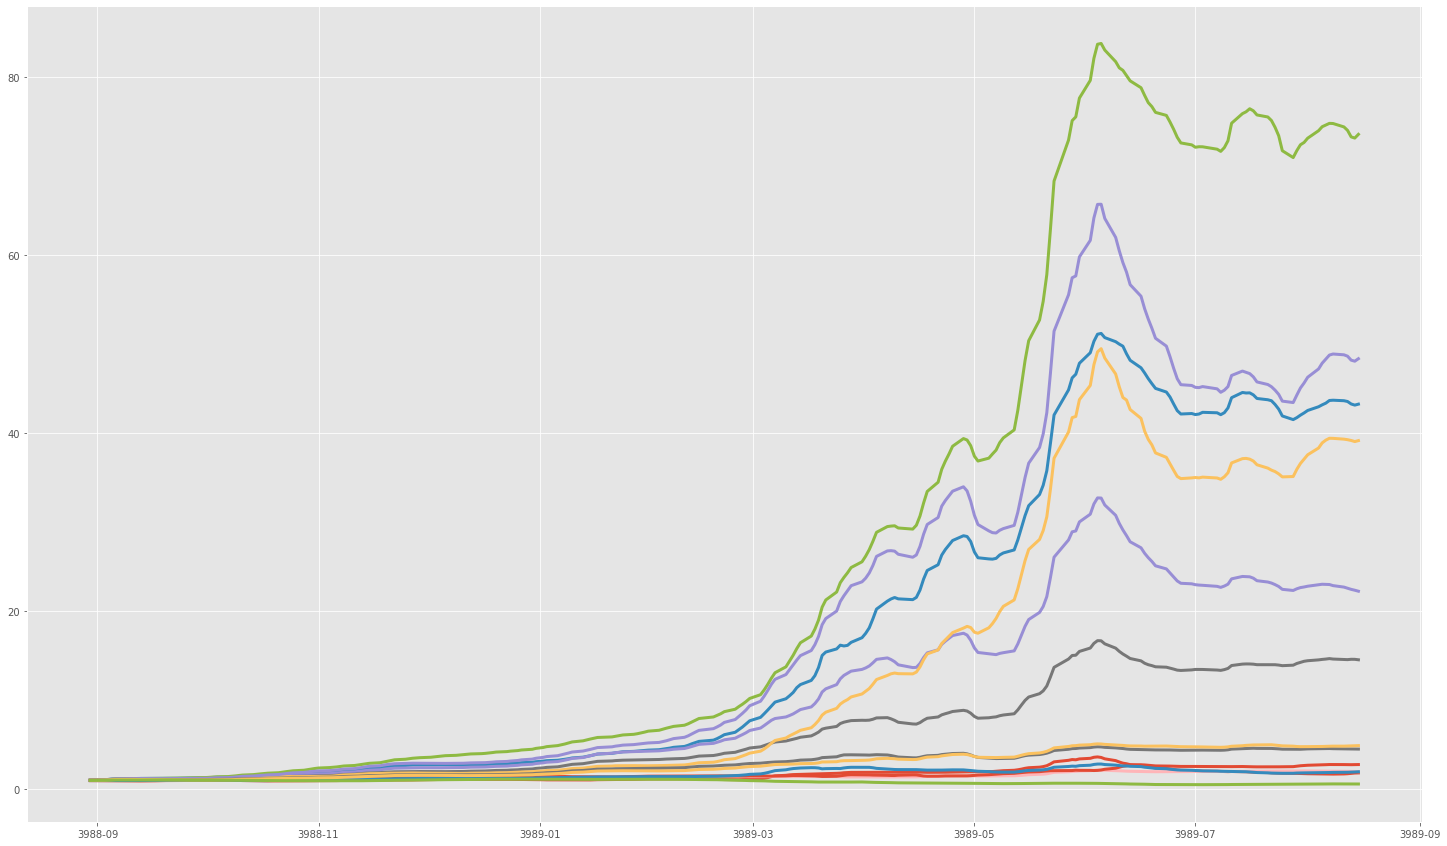

In [69]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (25, 15)

ls_factor_returns = pd.DataFrame()

for factor, factor_data in clean_factor_data.items():
    ls_factor_returns[factor] = al.performance.factor_returns(factor_data).iloc[:, 0]

plt.plot((1+ls_factor_returns).cumprod(), lw=3);

### 5 - 2 - Quantile analysis

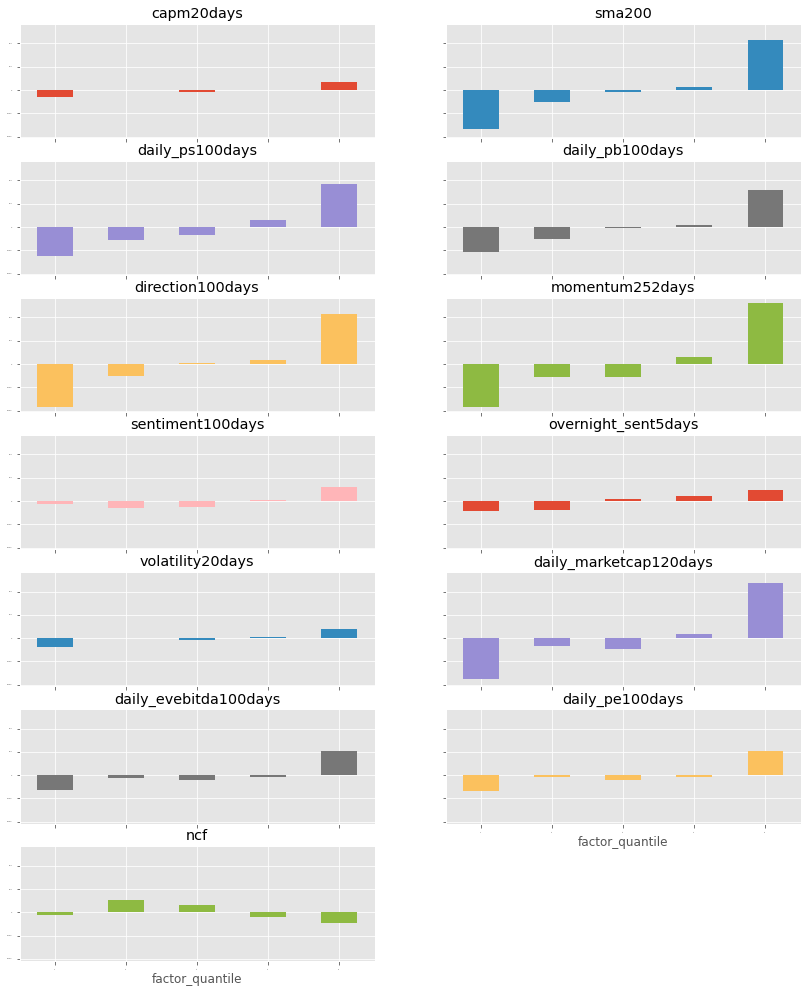

In [70]:
qr_factor_returns = pd.DataFrame()

for factor, factor_data in unixt_factor_data.items():
    qr_factor_returns[factor] = al.performance.mean_return_by_quantile(factor_data)[0].iloc[:, 0]

(10000*qr_factor_returns).plot.bar(
    subplots=True,
    sharey=True,
    layout=(20,2),
    figsize=(14, 50),
    legend=False, fontsize=2);

### 5 - 3 - Factor Rank Autocorrelation

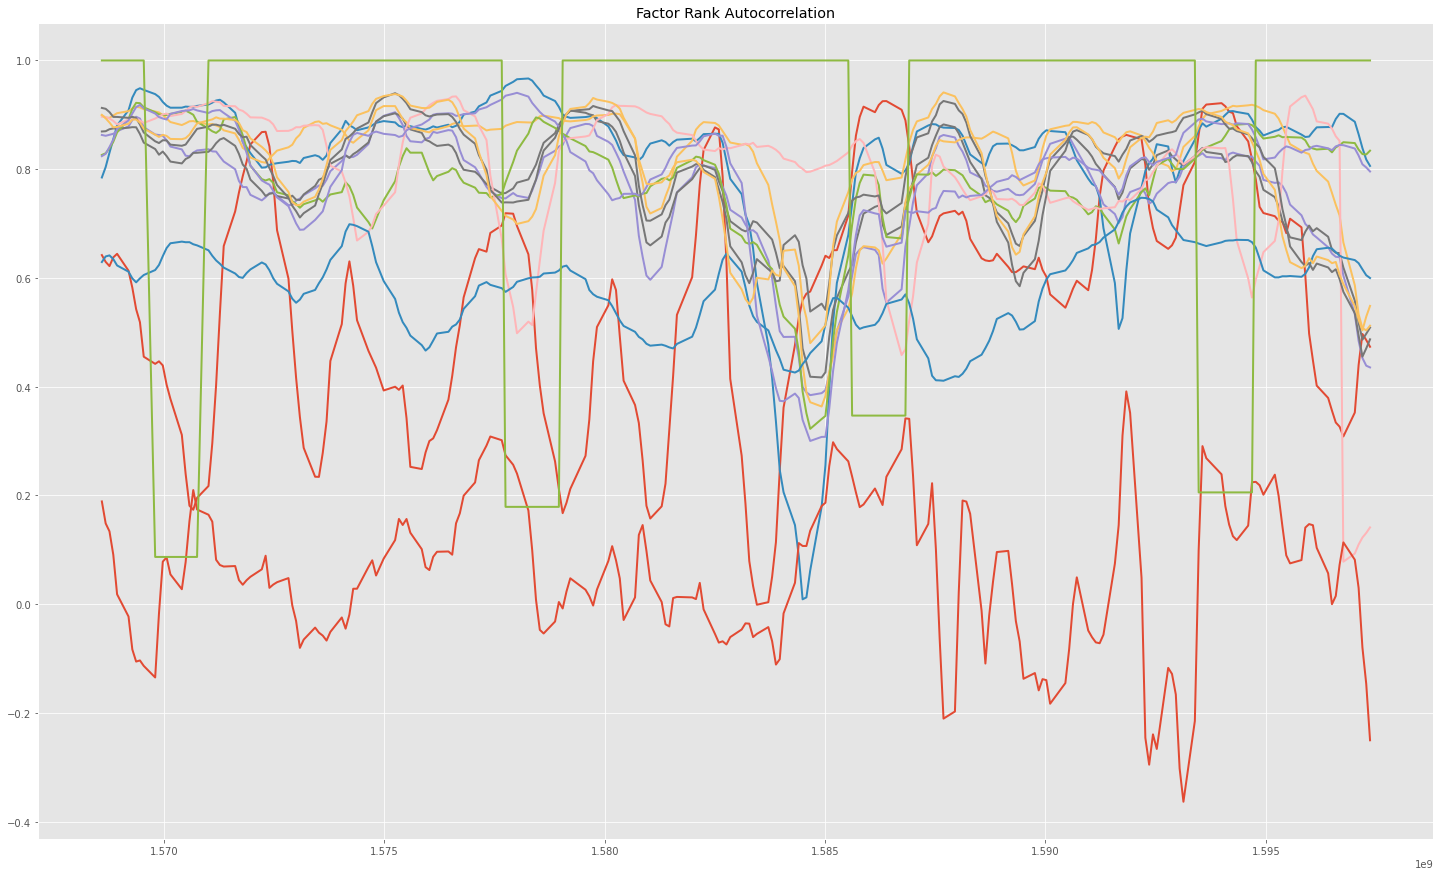

In [71]:
ls_FRA = pd.DataFrame()

for factor, factor_data in unixt_factor_data.items():
    ls_FRA[factor] = al.performance.factor_rank_autocorrelation(factor_data,period=rebalance_period)

plt.plot(ls_FRA,lw=2)
plt.title("Factor Rank Autocorrelation");

### 5 - 4 - Sharpe ratio

In [72]:
def sharpe_ratio(factor_returns, annualization_factor):

    df_sharpe = pd.Series(annualization_factor*factor_returns.mean()/factor_returns.std())
    
    return df_sharpe

In [73]:
daily_annualization_factor = np.sqrt(252)
df_sharpe = sharpe_ratio(ls_factor_returns, daily_annualization_factor).round(2)

In [74]:
df_sharpe.sort_values(ascending=False)

momentum252days           15.37
sma200                    12.80
daily_marketcap120days    11.45
direction100days          10.95
daily_pb100days           10.39
daily_ps100days            9.96
daily_pe100days            9.88
daily_evebitda100days      8.83
sentiment100days           6.06
overnight_sent5days        6.05
volatility20days           3.26
capm20days                 2.40
ncf                       -3.95
dtype: float64

# 6 - Combined factors

## 6 - 1 - Combining selceted factors

In [75]:

selected_factors = [
                         'sma200',
                         'daily_ps100days',
                         'daily_pb100days',
                         'direction100days',
                         'momentum252days',
                         'sentiment100days',
                         #'overnight_sent5days',
                         'volatility20days',
                         'daily_marketcap120days',
                         'daily_evebitda100days',
                         'daily_pe100days',
                         #'capm20days'
                   ]

print('Selected Factors:\n{} '.format(',\n'.join(selected_factors)))

all_factors = all_factors[selected_factors]

Selected Factors:
sma200,
daily_ps100days,
daily_pb100days,
direction100days,
momentum252days,
sentiment100days,
volatility20days,
daily_marketcap120days,
daily_evebitda100days,
daily_pe100days 


In [76]:
all_factors.to_csv('data/all_factors_test.csv')

Time to train full ML pipline: 5.456364870071411 secs
Accuracy on train set = 82.04%
Predictions: [ 1.  1. -1. ...  1. -1.  1.]
Probabilities of class == 1: [56.16669  56.81289  45.06007  ... 67.8037   41.0124   74.658585]
Accuracy on test set = 50.63%
Log-loss = 0.74083


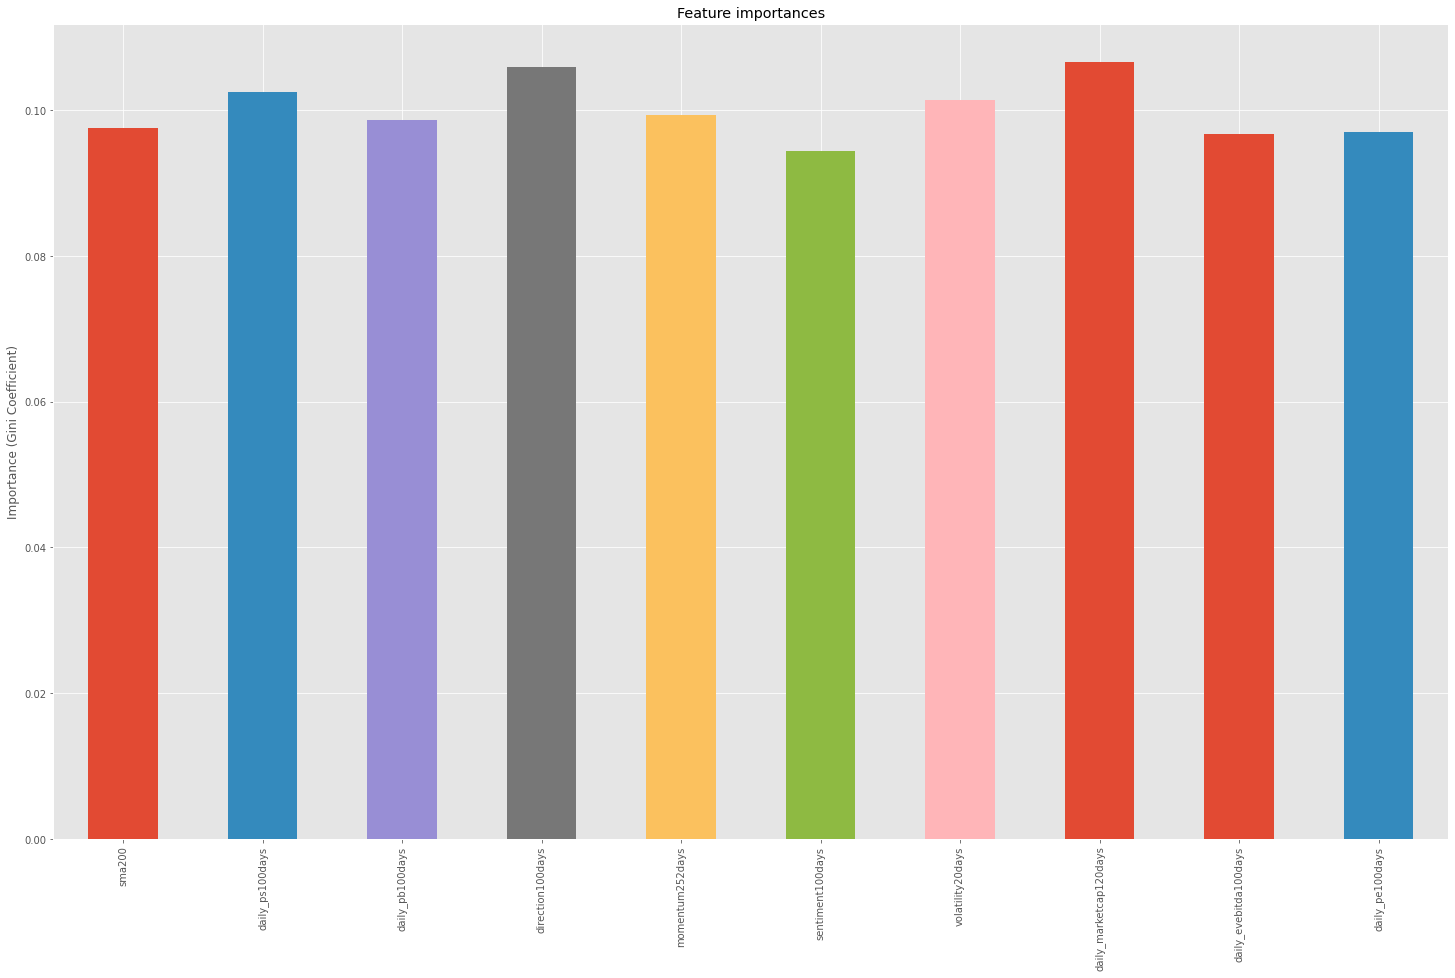

In [77]:
feature_importances = LE().feature_importance_xgb(n_fwd_days = rebalance_period, 
                                                         close = close, 
                                                         all_factors = all_factors,
                                                         lower_percentile = 30,
                                                         upper_percentile = 70,
                                                         n_estimators = 200, 
                                                         train_size = 0.7)

In [78]:
feature_importances.sort_values(by='weights')

weights
factors                         
sentiment100days        0.094398
daily_evebitda100days   0.096697
daily_pe100days         0.097003
sma200                  0.097592
daily_pb100days         0.098598
momentum252days         0.099398
volatility20days        0.101365
daily_ps100days         0.102483
direction100days        0.105904
daily_marketcap120days  0.106561

In [79]:
all_factors_copy = all_factors.copy() 

In [80]:
for factor in selected_factors:
    all_factors_copy.loc[:,factor] = feature_importances.loc[factor][0] * all_factors.loc[:,factor]
all_factors_copy.loc[:,'alpha_vector'] = all_factors.sum(axis=1)
all_factors = all_factors_copy  

In [81]:
vec = pd.DataFrame(data=all_factors['alpha_vector'],columns = ['alpha_vector','sector'])
for date in vec.index.levels[0]:
    vec.loc[date,['sector']] = meta_ex_cu_de_cap.loc[vec.index.levels[1]]['sector'].values
sectors = vec['sector']

In [82]:
vec.shape

(92988, 2)



## 6 - 2 - Creating clean factor data

In [83]:
factor_data = al.utils.get_clean_factor_and_forward_returns(factor = all_factors['alpha_vector'], 
                                                          prices = pricing, 
                                                          periods = combined_periods,
                                                          quantiles = qunatile_portions,
                                                          groupby=sectors,
                                                          binning_by_group=False,
                                                          filter_zscore=20,
                                                          max_loss=0.15)

Dropped 7.9% entries from factor data: 7.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 15.0%, not exceeded: OK!


## 6 - 3 - Creating tear sheets 

In [84]:
pf_returns, pf_positions, pf_benchmark = \
al.performance.create_pyfolio_input(factor_data,
                                       period='{}D'.format(rebalance_period),
                                       capital=1,
                                       long_short=True,
                                       group_neutral=False,
                                       equal_weight=False,
                                       #quantiles=[1,2,4,5],
                                       groups=sectors)

In [85]:
pf_benchmark = benchmark.loc[slice(pf_returns.index[0],pf_returns.index[-1])]

In [86]:
sec_mappings = sectors.loc[pd.IndexSlice[pf_returns.index[0]]]

In [87]:
sector_mappings = {}
for i in sec_mappings.index:
    sector_mappings[i] = sec_mappings.loc[i]

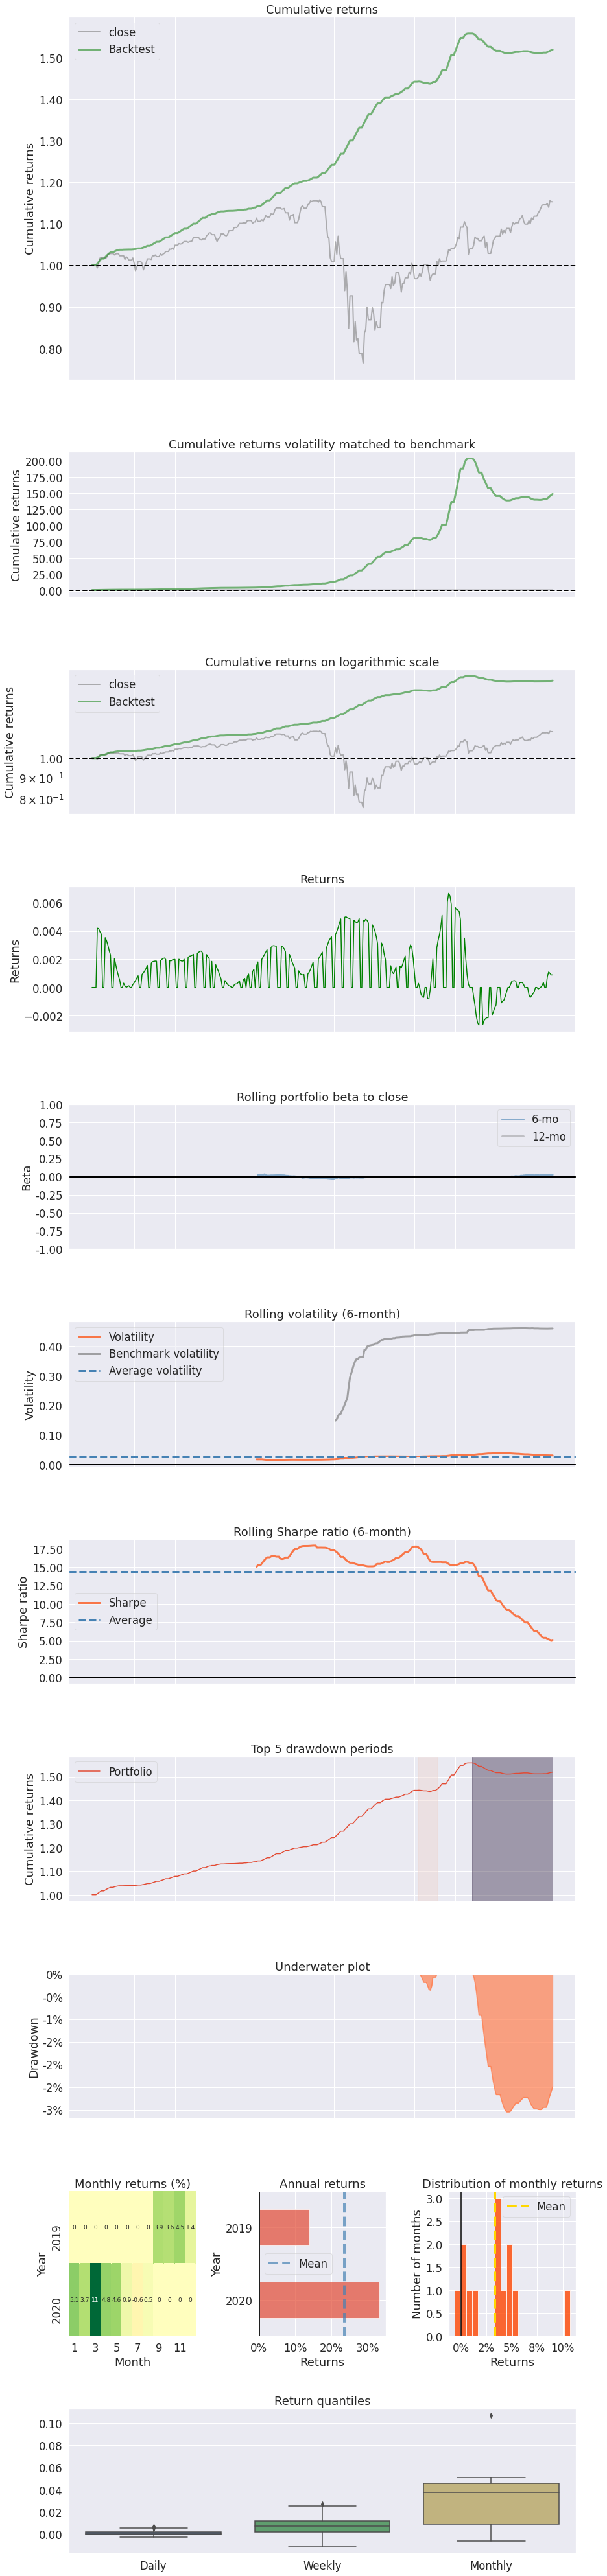

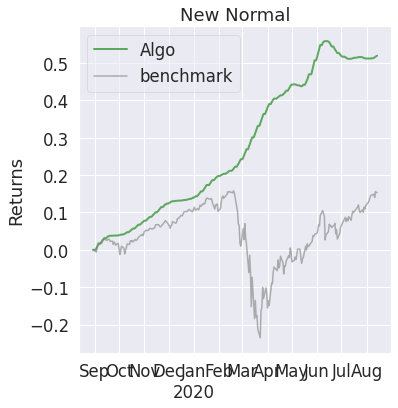

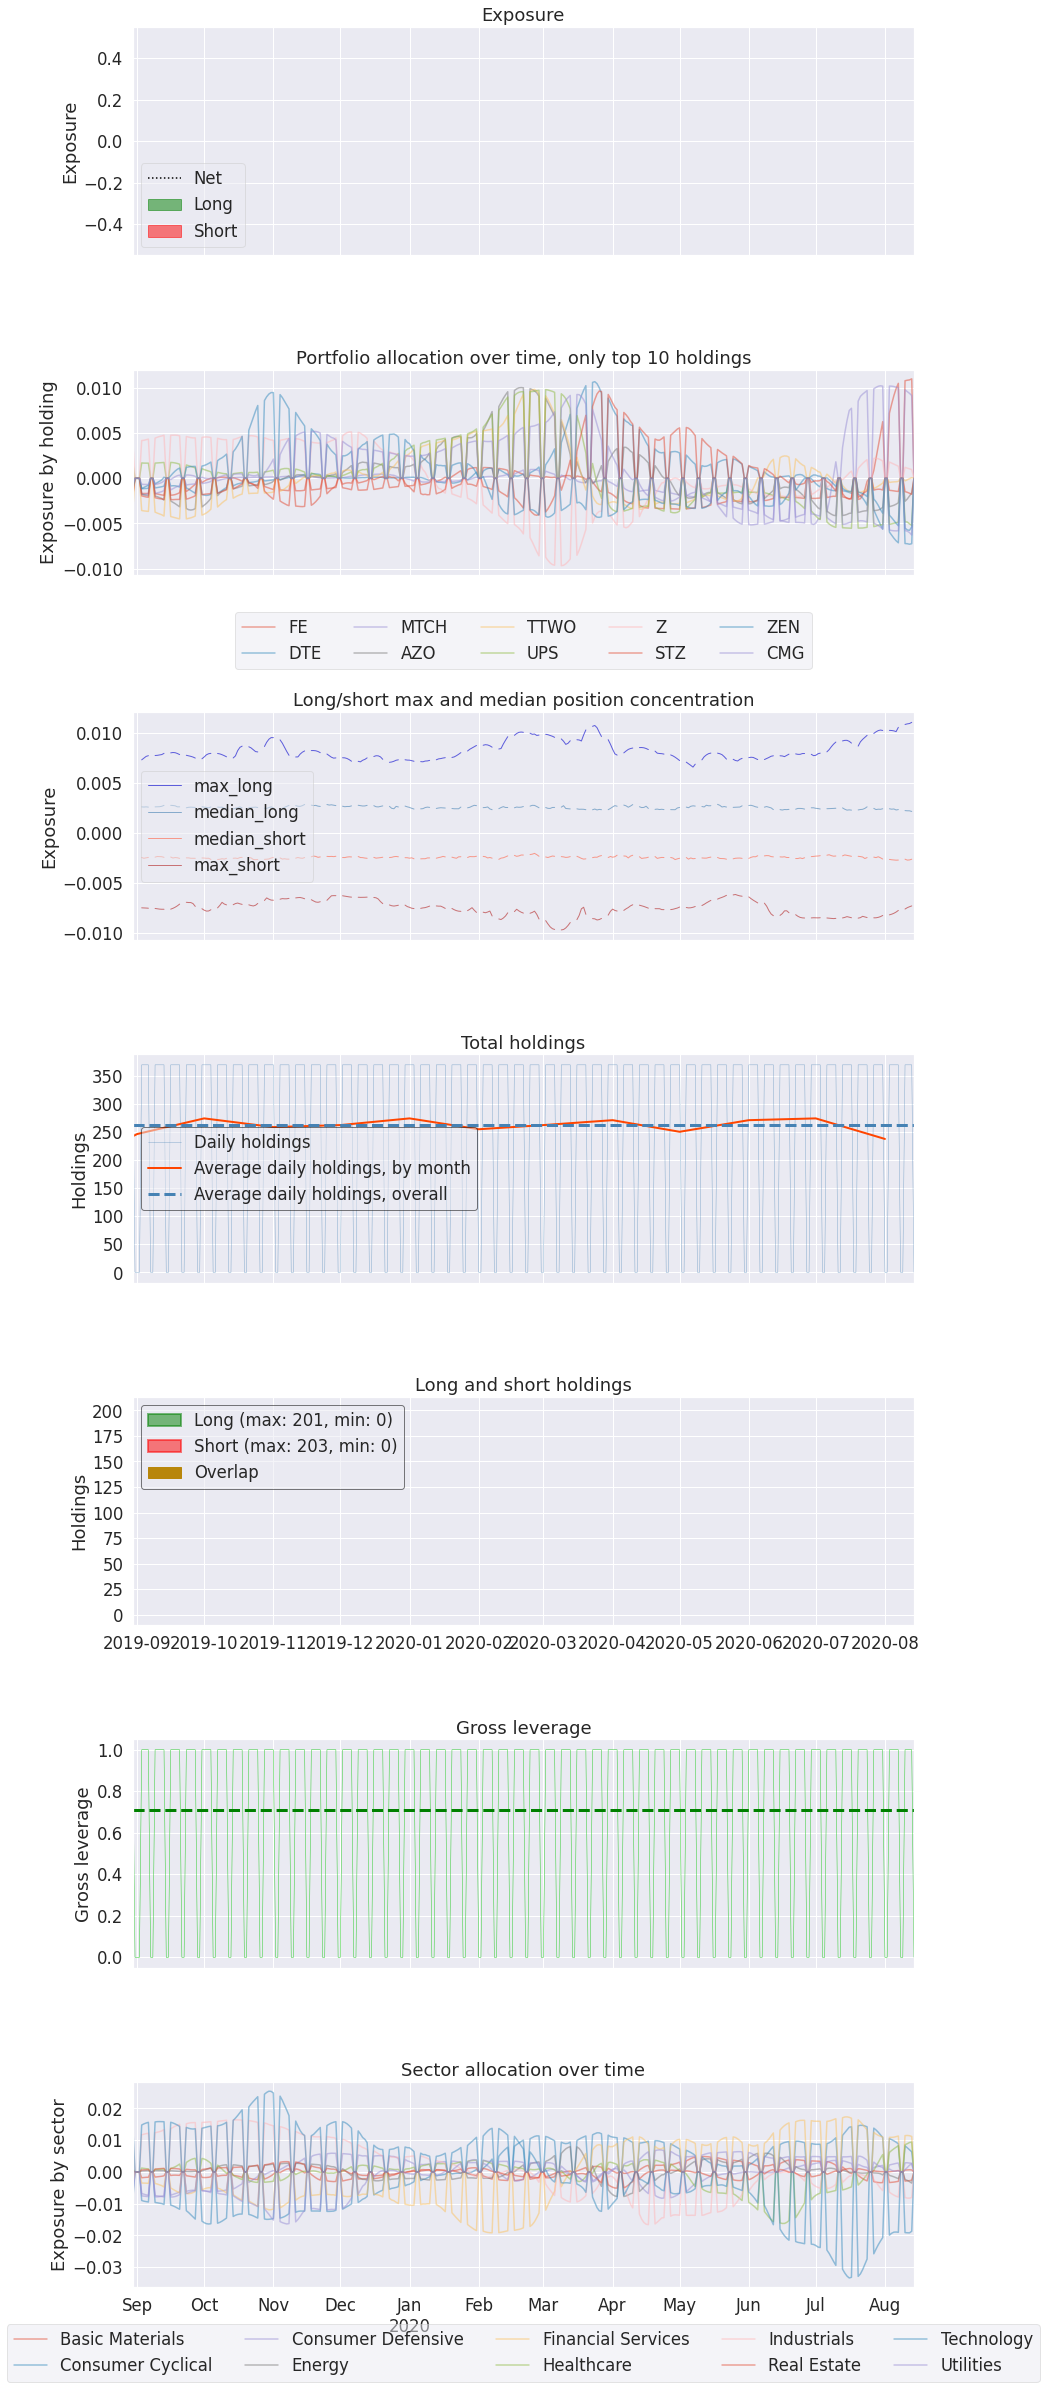

In [88]:
pf.create_full_tear_sheet(returns = pf_returns, 
                          positions = pf_positions,
                          sector_mappings = sector_mappings,
                          benchmark_rets = pf_benchmark )

Quantiles Statistics


min        max       mean       std  count   count %
factor_quantile                                                            
1               -23.676021  -7.743158 -11.819106  2.005785   3480  4.065041
2               -14.239001  -6.383435  -9.448195  1.386756   3480  4.065041
3               -12.191315  -5.229688  -8.065704  1.199891   3480  4.065041
4               -10.814997  -4.381505  -7.034935  1.097635   3248  3.794038
5                -9.670500  -3.666193  -6.120491  0.996151   3480  4.065041
6                -8.292955  -2.837978  -5.269384  0.870898   3480  4.065041
7                -7.186893  -2.454123  -4.505043  0.790687   3480  4.065041
8                -5.938660  -2.045460  -3.757855  0.714305   3248  3.794038
9                -4.915475  -1.416144  -3.041286  0.666595   3480  4.065041
10               -4.049821  -0.707874  -2.316603  0.608929   3480  4.065041
11               -3.123598  -0.136891  -1.619986  0.558932   3248  3.794038
12               -2.352766   0.713626  -0.907068  0.557130   3480  4.065041
13               -1.361940   1.334488  -0.145048  0.557875   3480  4.065041
14               -0.664117   2.026608   0.604166  0.589325   3480  4.065041
15               -0.095500   2.882109   1.317435  0.616475   3248  3.794038
16                0.716008   3.719512   2.067135  0.630478   3480  4.065041
17                1.453097   5.119768   2.869969  0.670300   3480  4.065041
18                2.063260   5.950603   3.669739  0.767768   3248  3.794038
19                2.747438   6.871349   4.484266  0.831571   3480  4.065041
20                3.372495   8.200251   5.347224  0.914414   3480  4.065041
21                4.150137   9.443498   6.251556  1.015933   3480  4.065041
22                4.855458  10.652155   7.207993  1.078711   3248  3.794038
23                5.585401  11.756163   8.314434  1.215456   3480  4.065041
24                6.846621  14.542693   9.766371  1.428069   3480  4.065041
25                8.188010  23.117962  12.508873  2.261272   3480  4.065041

Returns Analysis


5D      10D      20D
Ann. alpha                                       0.604    0.550    0.472
beta                                             0.160    0.002   -0.011
Mean Period Wise Return Top Quantile (bps)     267.230  217.192  188.378
Mean Period Wise Return Bottom Quantile (bps) -138.677 -113.151  -96.034
Mean Period Wise Spread (bps)                  405.907  329.227  283.976

<Figure size 1800x1080 with 0 Axes>

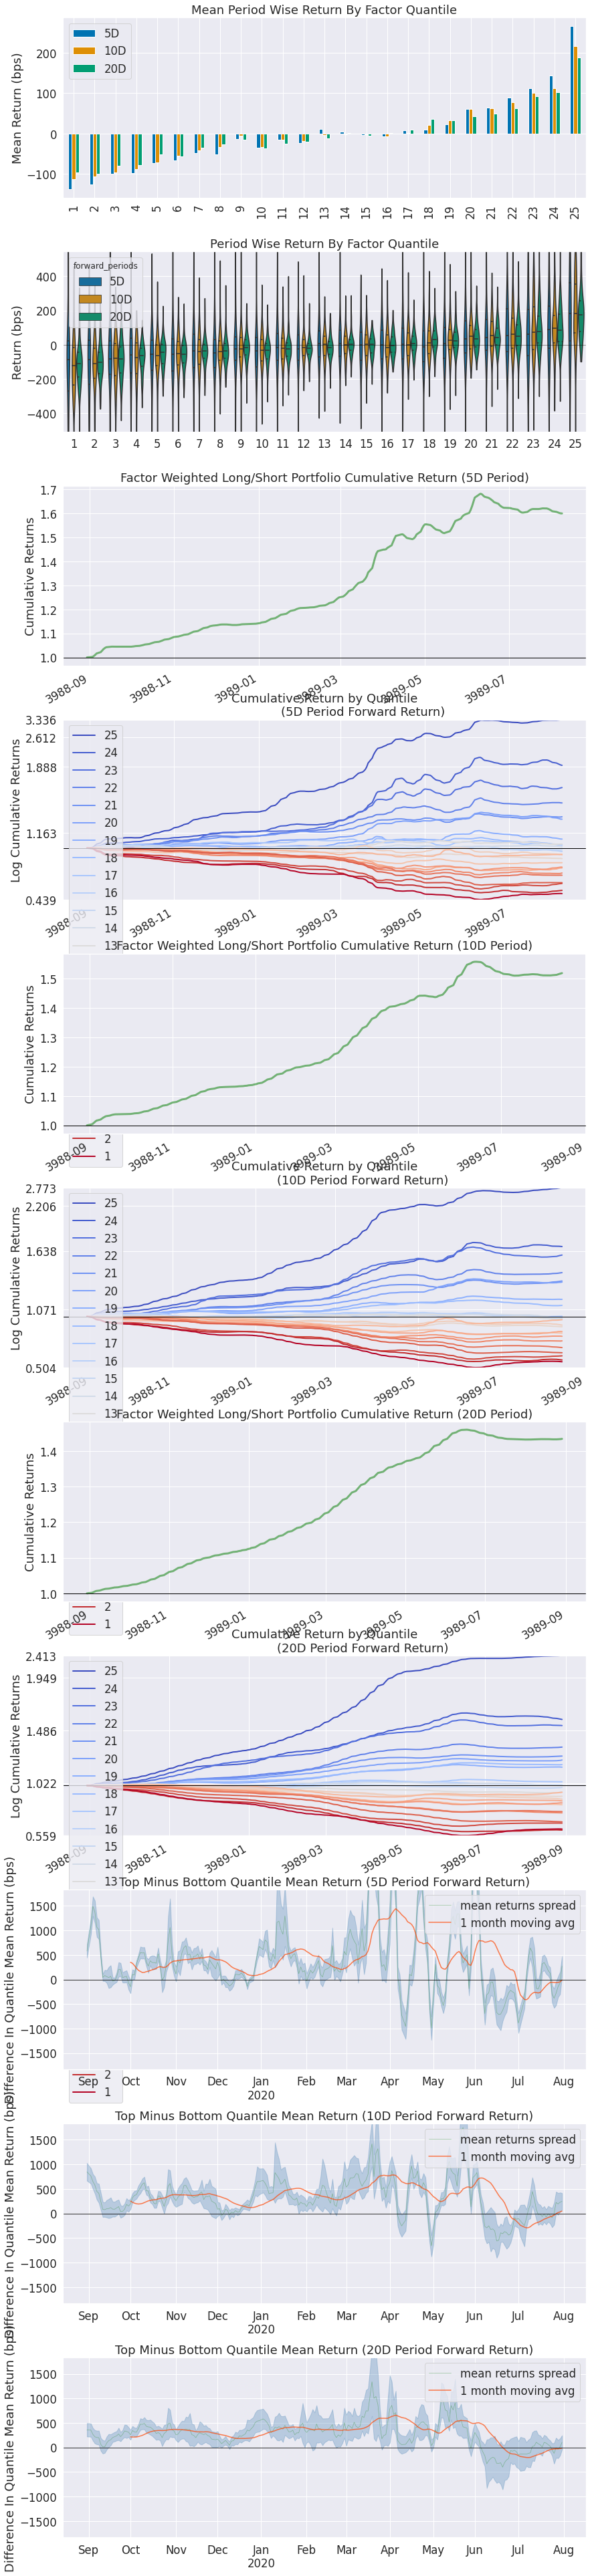

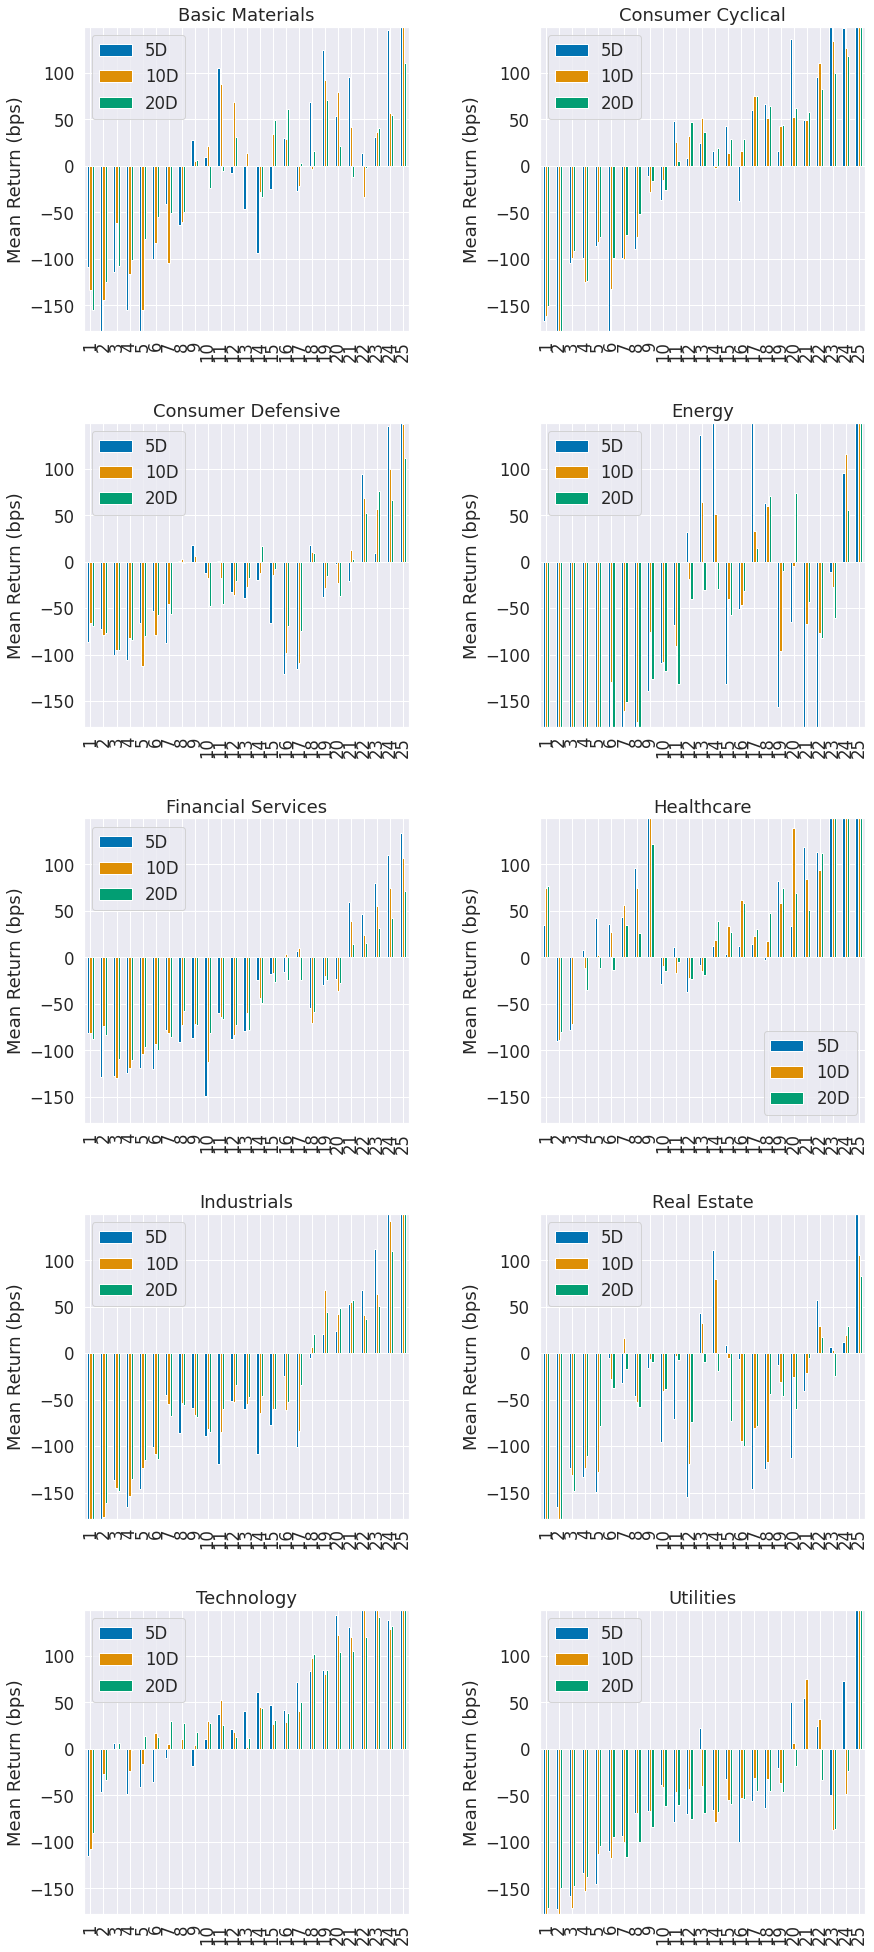

Information Analysis


5D     10D     20D
IC Mean           0.124   0.181   0.239
IC Std.           0.224   0.214   0.202
Risk-Adjusted IC  0.552   0.845   1.183
t-stat(IC)        8.412  12.863  18.020
p-value(IC)       0.000   0.000   0.000
IC Skew          -0.159  -0.690  -0.857
IC Kurtosis      -0.419  -0.289  -0.132

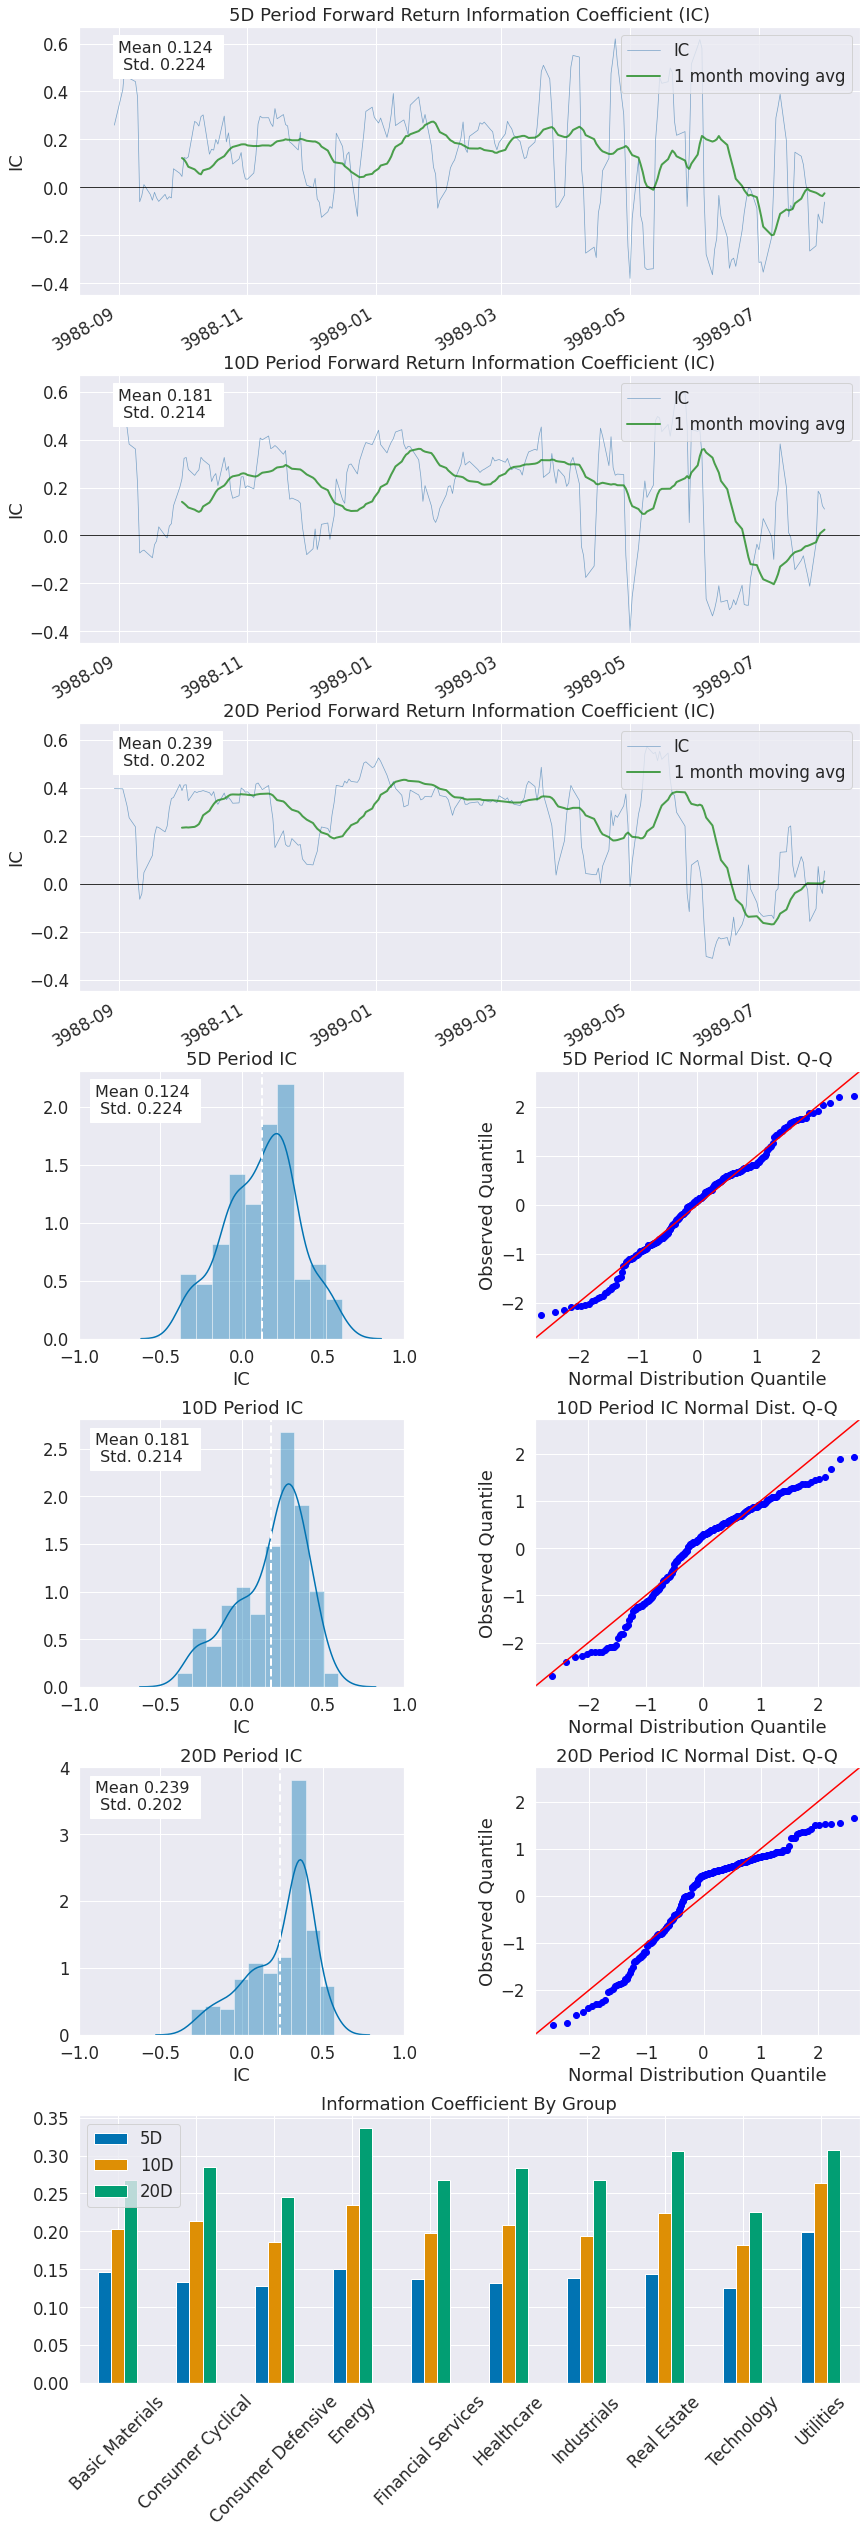

Turnover Analysis


10D    20D     5D
Quantile 1 Mean Turnover    0.568  0.765  0.394
Quantile 2 Mean Turnover    0.779  0.857  0.679
Quantile 3 Mean Turnover    0.848  0.898  0.754
Quantile 4 Mean Turnover    0.875  0.918  0.804
Quantile 5 Mean Turnover    0.886  0.915  0.816
Quantile 6 Mean Turnover    0.892  0.924  0.831
Quantile 7 Mean Turnover    0.897  0.934  0.853
Quantile 8 Mean Turnover    0.918  0.947  0.870
Quantile 9 Mean Turnover    0.906  0.939  0.843
Quantile 10 Mean Turnover   0.911  0.940  0.871
Quantile 11 Mean Turnover   0.915  0.949  0.868
Quantile 12 Mean Turnover   0.913  0.938  0.860
Quantile 13 Mean Turnover   0.908  0.932  0.868
Quantile 14 Mean Turnover   0.904  0.936  0.848
Quantile 15 Mean Turnover   0.914  0.947  0.868
Quantile 16 Mean Turnover   0.909  0.931  0.853
Quantile 17 Mean Turnover   0.898  0.945  0.863
Quantile 18 Mean Turnover   0.910  0.937  0.852
Quantile 19 Mean Turnover   0.903  0.933  0.826
Quantile 20 Mean Turnover   0.889  0.931  0.826
Quantile 21 Mean Turnover   0.868  0.909  0.821
Quantile 22 Mean Turnover   0.860  0.915  0.812
Quantile 23 Mean Turnover   0.839  0.887  0.748
Quantile 24 Mean Turnover   0.787  0.881  0.681
Quantile 25 Mean Turnover   0.597  0.825  0.407

5D    10D    20D
Mean Factor Rank Autocorrelation  0.912  0.807  0.624

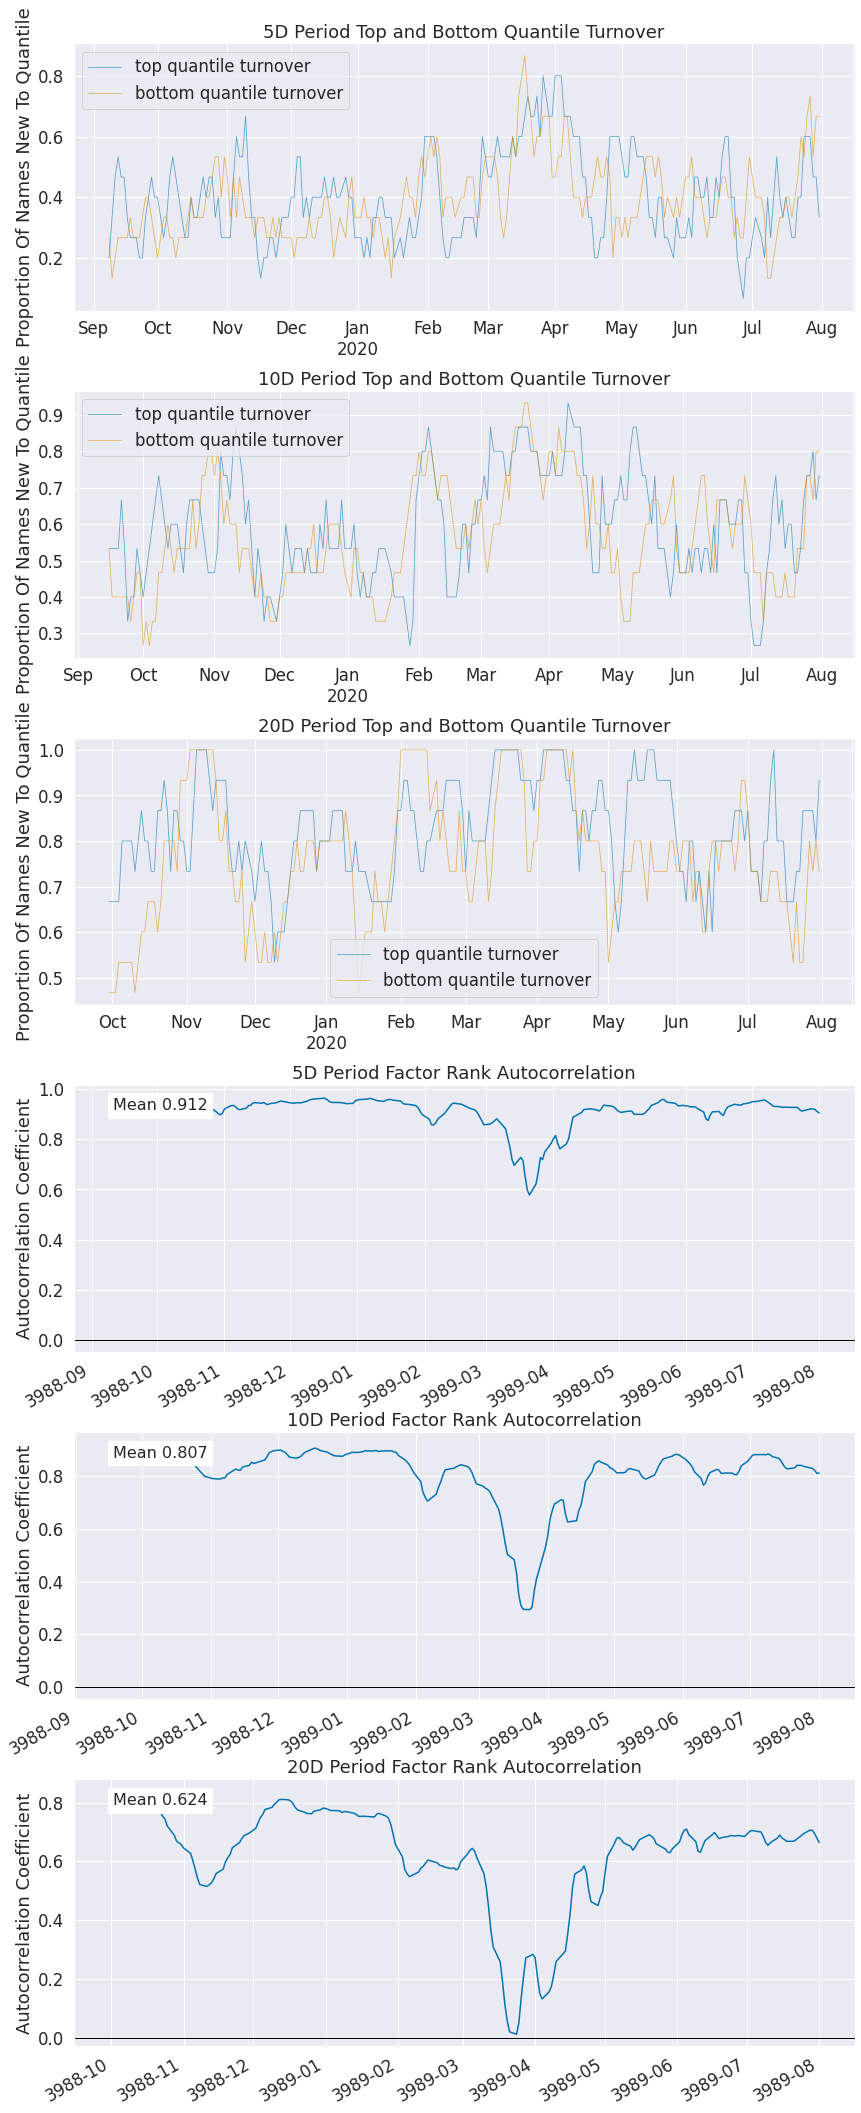

In [89]:
al.tears.create_full_tear_sheet(factor_data, by_group=True, long_short=True, group_neutral=False);

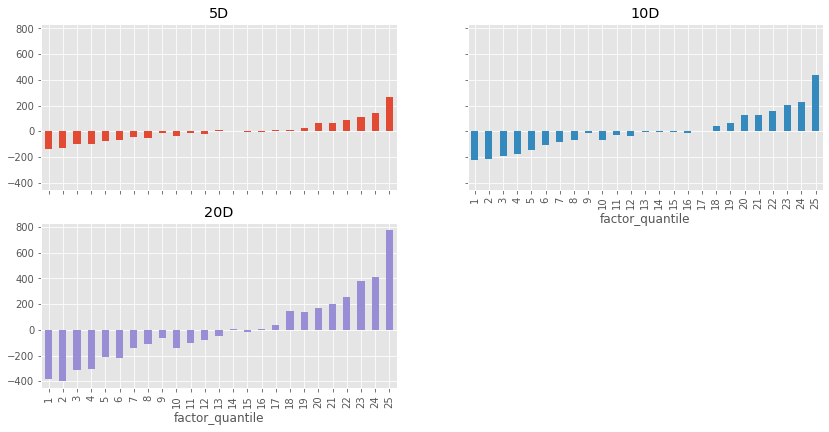

In [90]:
qr_factor_returns = pd.DataFrame()

qr_factor_returns = al.performance.mean_return_by_quantile(factor_data)[0]

(10000*qr_factor_returns).plot.bar(
    subplots=True,
    sharey=True,
    layout=(4,2),
    figsize=(14, 14),
    legend=False);

In [91]:
ls_factor_returns = al.performance.factor_returns(factor_data)

In [92]:
daily_annualization_factor = np.sqrt(252)
sharpe_ratio(ls_factor_returns, daily_annualization_factor).round(2)

5D      7.45
10D    11.68
20D    15.70
dtype: float64

# 7 -  Risk analysis 

In [93]:
dff = pd.DataFrame()
dff['factor'] = all_factors['alpha_vector']
df_all_weights = al.performance.factor_weights(dff, demeaned=True, group_adjust=False, equal_weight=False)
all_weights = df_all_weights.loc[pd.IndexSlice[all_factors.index.levels[0][-1]]]
all_weights = pd.DataFrame(data = all_weights.values, 
                                           columns = ['optimal_weights'],
                                           index = all_weights.index)
all_weights.index.name = 'asset'

In [94]:
assets = all_weights.index

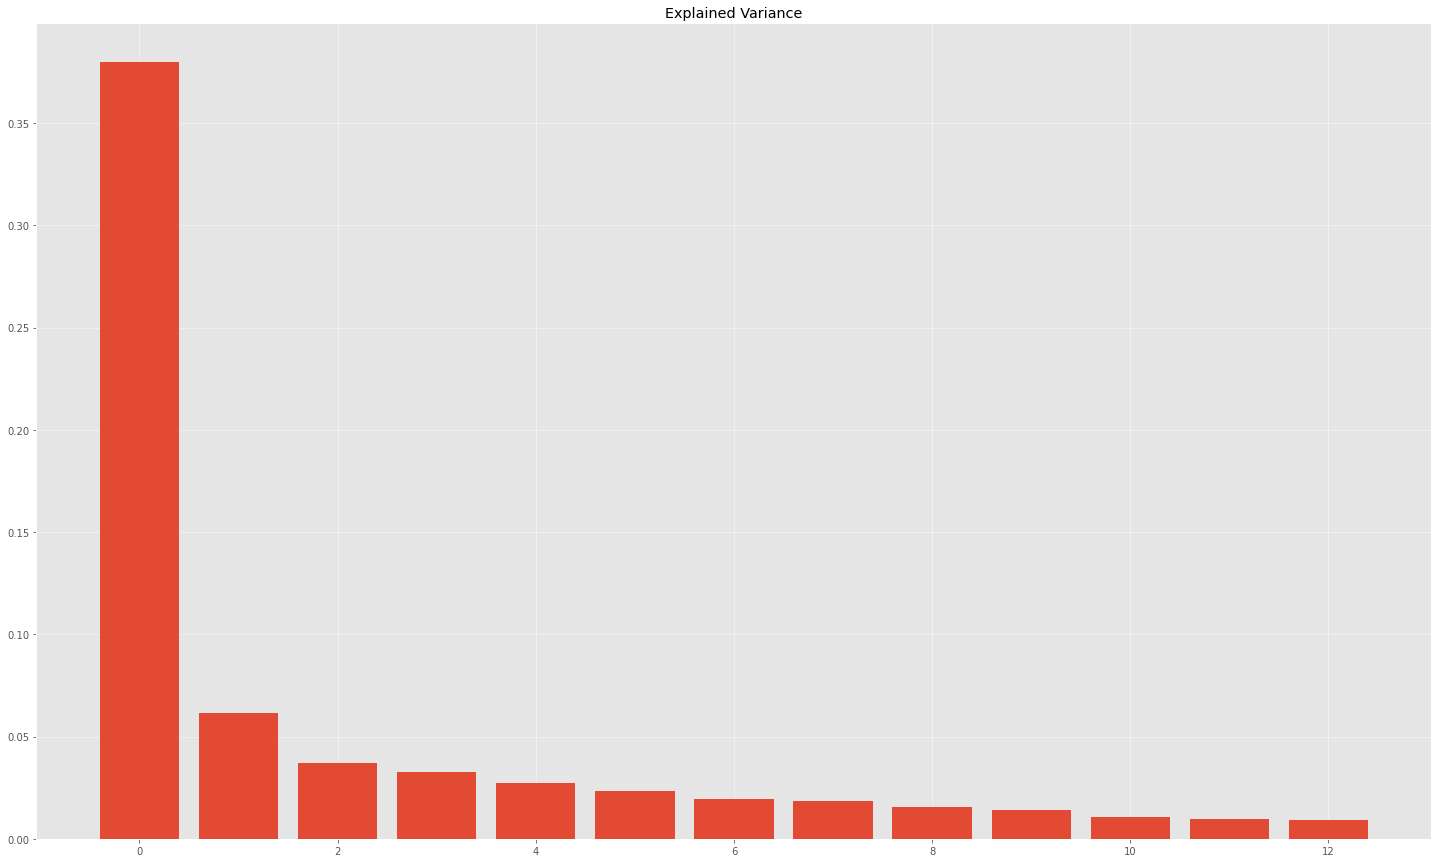

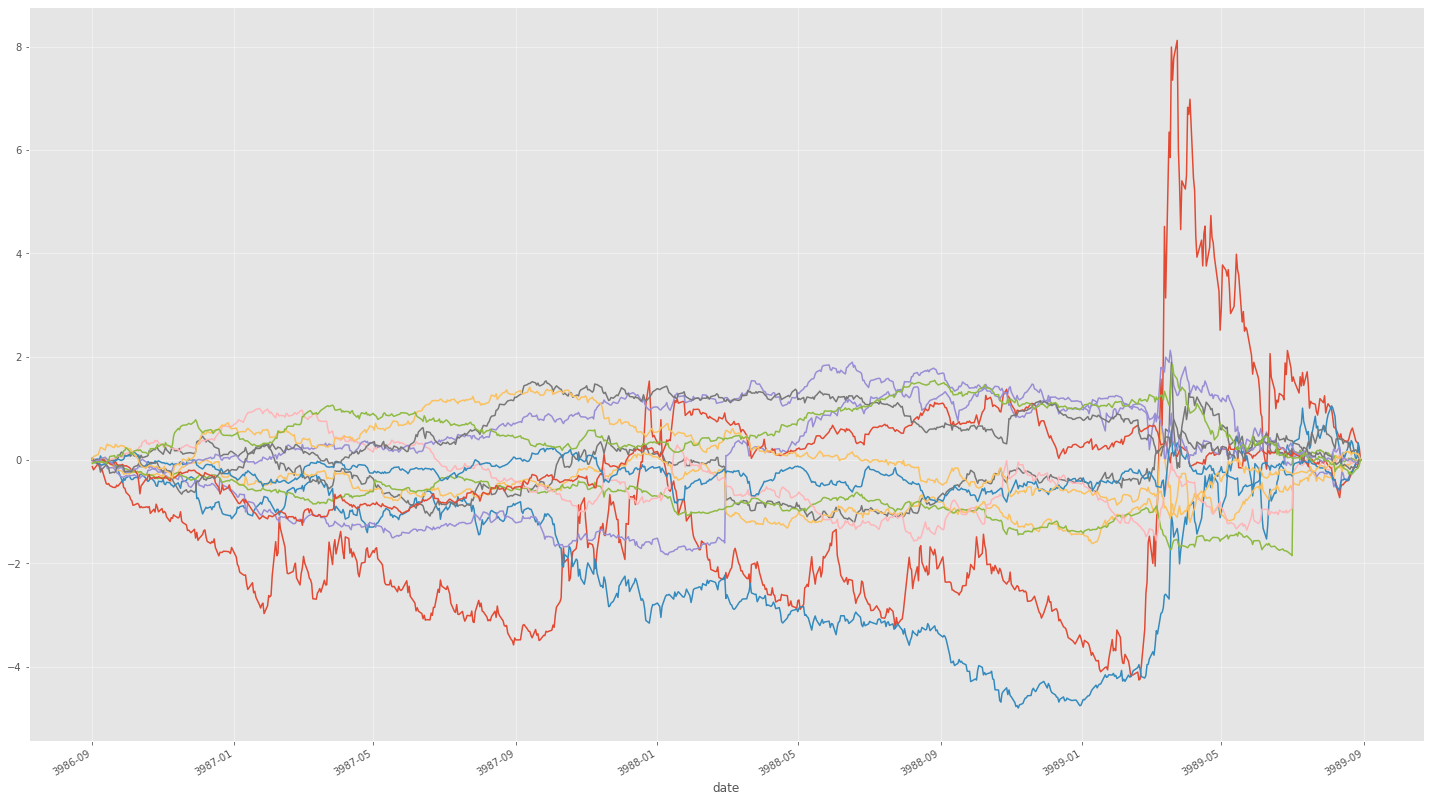

In [95]:
predicted_portfolio_risk,Risk_Model = RM().portfolio_risk(close[assets],num_factor_exposures=13,weights=all_weights)

In [96]:
print ('Predicted Risk: {} %'.format(np.round((predicted_portfolio_risk*100),2)))

Predicted Risk: 4.01 %


# 8 - Integrating factor data to optimzer

Once alpha model and a risk model are generated, we want to find a portfolio that trades as close as possible to the alpha model but limiting risk as measured by the [risk_model](https://github.com/keyvantaj/Quantitative/blob/master/risk_model.py). The [cxpy](https://www.cvxpy.org/) package is used to implement the [optimizer](https://github.com/keyvantaj/Quantitative/blob/master/optimizer.py)

The CVXPY objective function is to maximize 𝛼𝑇 ∗ 𝑥 , where x is the portfolio weights and alpha is the alpha vector.

In the other hand we have the following constraints:

- $ r \leq risk_{\text{cap}}^2 \\ $
- $ B^T * x \preceq factor_{\text{max}} \\ $
- $ B^T * x \succeq factor_{\text{min}} \\ $
- $ x^T\mathbb{1} = 0 \\ $
- $ \|x\|_1 \leq 1 \\ $
- $ x \succeq weights_{\text{min}} \\ $
- $ x \preceq weights_{\text{max}} $

Where x is the portfolio weights, B is the factor betas, and r is the portfolio risk calculated in [risk model](https://github.com/keyvantaj/Quantitative/blob/master/risk_model.py) module.

The first constraint is that the predicted risk be less than some maximum limit. The second and third constraints are on the maximum and minimum portfolio factor exposures. The fourth constraint is the "market neutral constraint: the sum of the weights must be zero. The fifth constraint is the leverage constraint: the sum of the absolute value of the weights must be less than or equal to 1.0. The last are some minimum and maximum limits on individual holdings.

In [97]:
optimal = pd.DataFrame(index = all_factors.index.levels[0], columns = all_factors.index.levels[1])
for date in all_factors.index.levels[0]:
    
    x = all_factors[['alpha_vector']].loc[date.date(),:]
    optimal.loc[date] = OHR(lambda_reg = lambda_reg,
                                         factor_max = factor_max, factor_min = factor_min, 
                                         weights_max = weights_max, weights_min = weights_min,
                                         risk_cap = risk_cap).find(
                                                                    x, 
                                                                    Risk_Model['factor_betas'], 
                                                                    Risk_Model['factor_cov_matrix'], 
                                                                    Risk_Model['idiosyncratic_var_vector']).values.flatten()
    
optimal = optimal.astype(np.float)
optimal_stacked = optimal.stack().to_frame('optimal_weights')

In [98]:
assert optimal_stacked.shape[0] == vec.shape[0]

## 8 - 1 - Quantile data

Before starting the factor analysis of the optimized alpha vector, we will define quantiles for data of each date. For this purpose, we use the `qunatile_portions` parameter defined previously to cut data with specific portions. Then we iterate over `optimal_stacked` and apply [pandas qcut](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.qcut.html) function for each date to finally stacked the data into a pandas data frame.

In [99]:
quantile_optimal_stacked = UT.quantilize(qunatile_portions, 
                                              optimal_stacked,
                                              'optimal_weights',
                                              'quantile',
                                              'sector',
                                               vec)

In [100]:
print ('quantiles:', list(set(quantile_optimal_stacked['quantile'].values)))

quantiles: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


## 8 - 2 - Quantiles indexing

The goal here is to select the edges using `quantile_to_analyse` previously define in <b>parameters</b> section. 

In [101]:
q_final_vector = UT.q_indexing(quantile_to_analyse, quantile_optimal_stacked)

In [102]:
percent_q_dropped = ((quantile_optimal_stacked.shape[0] - q_final_vector.shape[0])/quantile_optimal_stacked.shape[0])*100
print ('{} % dropped after quantile select'.format(np.round(percent_q_dropped,2)))

91.87 % dropped after quantile select


In [103]:
print ('selected quantiles:', list(set(q_final_vector['quantile'].values)))

selected quantiles: [25, 1]


## 8 - 3 - Sectors Selected

In [104]:
final_vector,sectors = UT.select_sector(q_final_vector, drop_long_sec, drop_short_sec,
                                        sec_col='sector',factor_col = 'quantile')

In [105]:
print ('{} rows dropped after sector select'.format(q_final_vector.shape[0] - final_vector.shape[0]))

0 rows dropped after sector select


# 9 - Optimized alpha vector analysis 

## 9 - 1 - Creating clean factor data

In [106]:
factor_data = al.utils.get_clean_factor_and_forward_returns(factor = final_vector['optimal_weights'], 
                                                          prices = pricing, 
                                                          periods = combined_periods,
                                                          quantiles = len(quantile_to_analyse),
                                                          groupby=sectors,
                                                          binning_by_group=False,
                                                          filter_zscore=20,
                                                          max_loss=0.15)

Dropped 7.9% entries from factor data: 7.9% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 15.0%, not exceeded: OK!


## 9 - 2 - Sector selection for factor data

In [107]:
factor_data, sectors = UT.select_sector(factor_data, drop_long_sec, drop_short_sec,
                                     sec_col='group',factor_col = 'factor_quantile')

In [108]:
print ('{} rows dropped from factor data'.format(factor_data.shape[0] - factor_data.shape[0]))

0 rows dropped from factor data


## 9 - 3 - Creating tear sheets 

In [109]:
pf_returns, pf_positions, pf_benchmark = \
al.performance.create_pyfolio_input(factor_data,
                                   period = '{}D'.format(rebalance_period),
                                   capital = 1,
                                   long_short = True,
                                   group_neutral = False,
                                   equal_weight = False,
                                   groups = sectors)

pf_benchmark = benchmark.loc[slice(pf_returns.index[0],pf_returns.index[-1])]
sec_mappings = sectors.loc[pd.IndexSlice[pf_returns.index[0]]]

sector_mappings = {}
for i in sec_mappings.index:
    sector_mappings[i] = sec_mappings.loc[i]

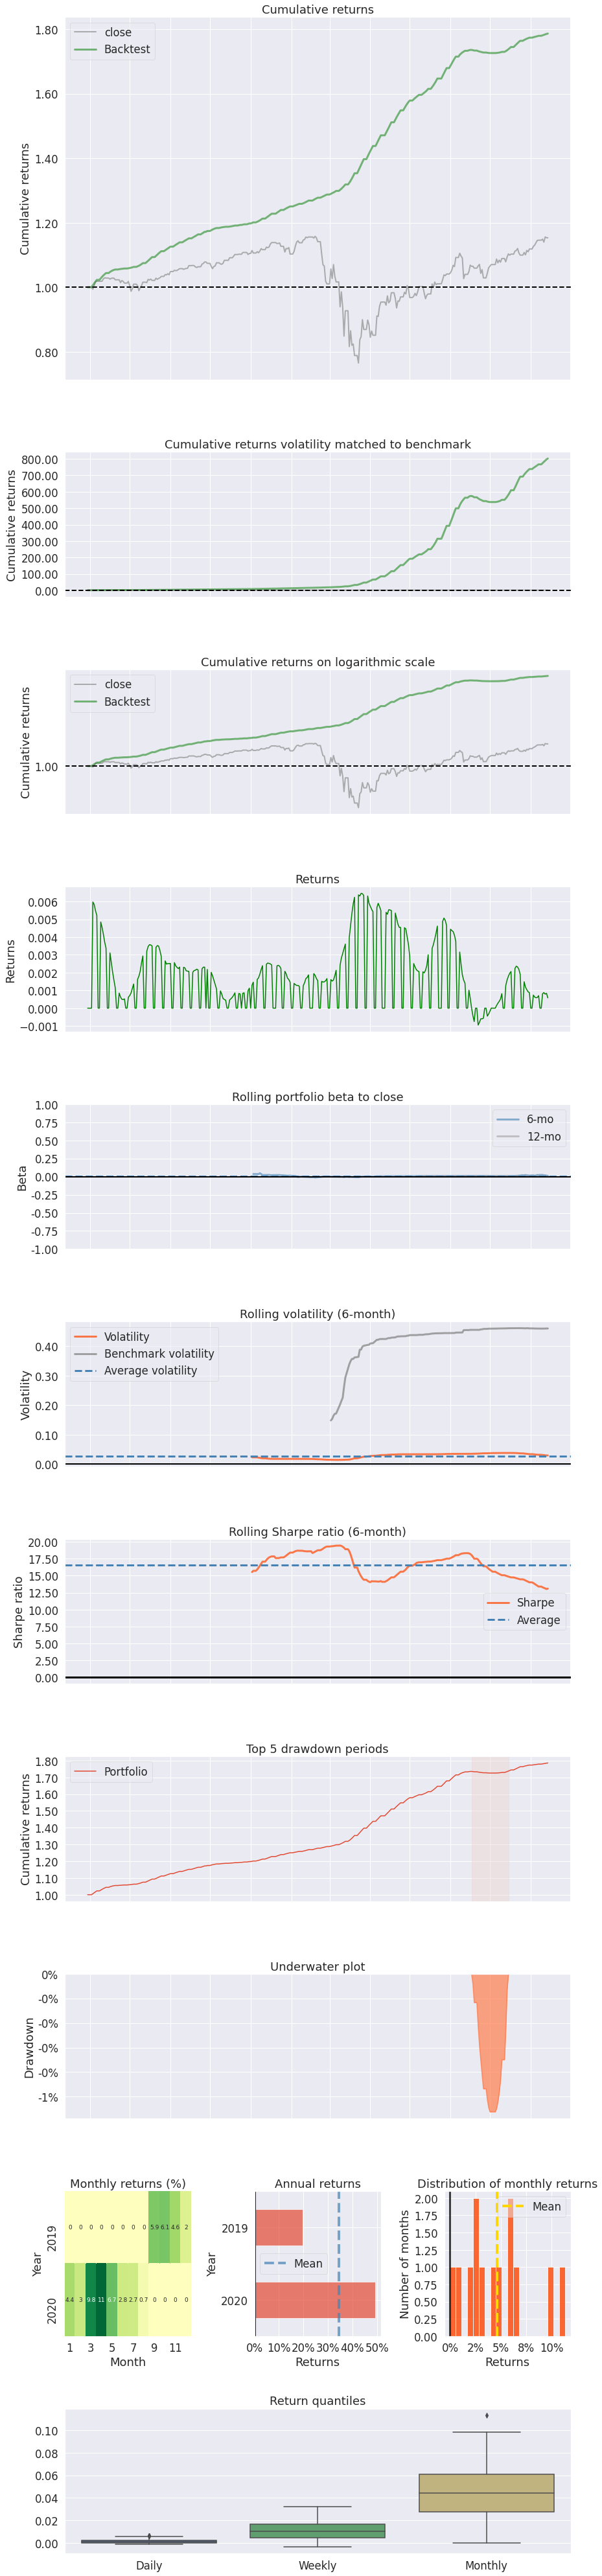

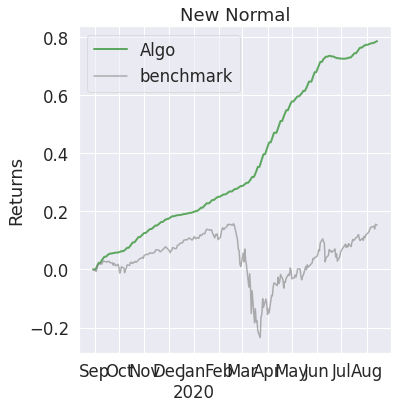

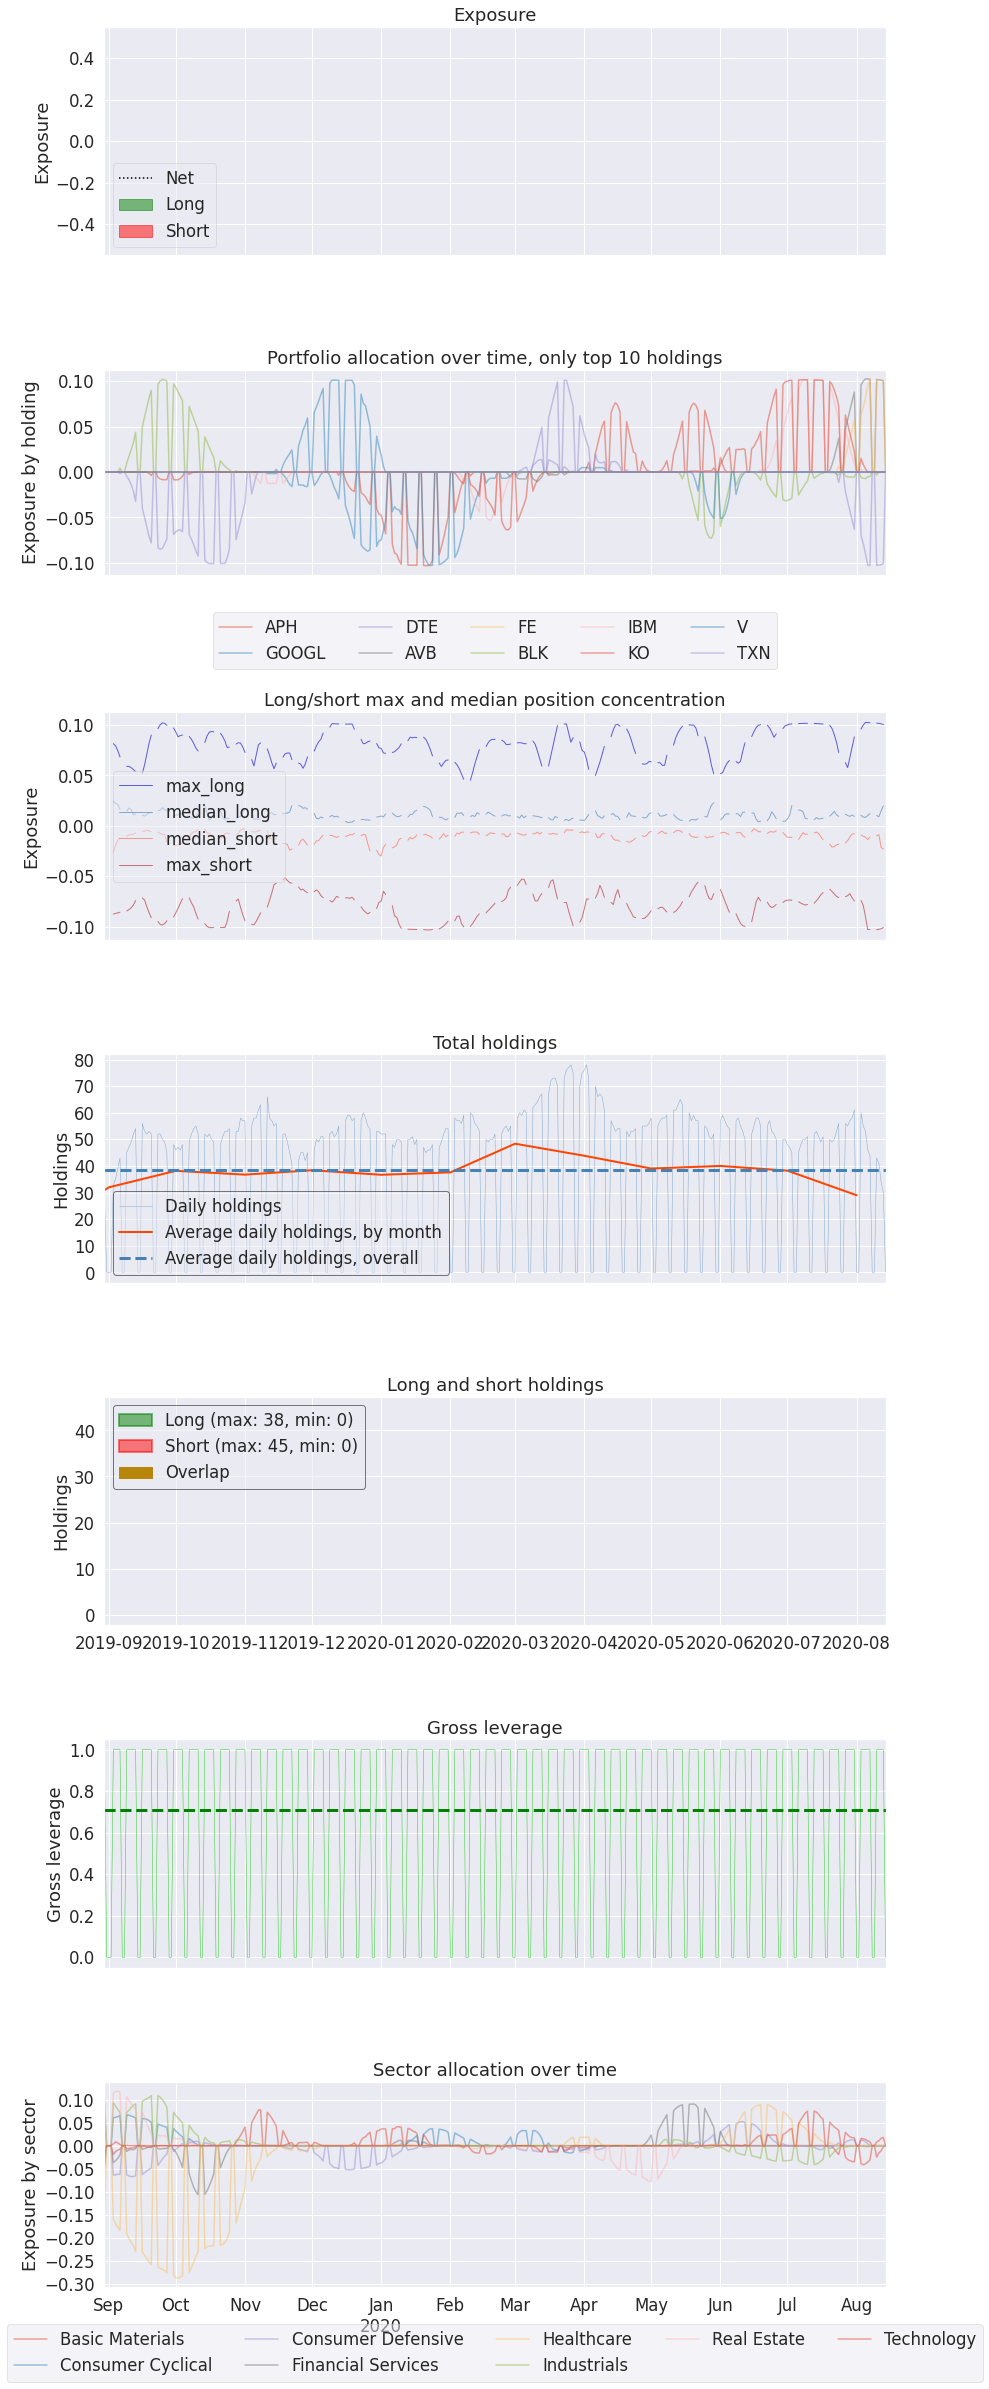

In [110]:
pf.create_full_tear_sheet(returns = pf_returns, 
                          positions = pf_positions,
                          sector_mappings = sector_mappings,
                          benchmark_rets = pf_benchmark,
                          factor_returns = factor_data[['factor']] )

Quantiles Statistics


min           max      mean       std  count  \
factor_quantile                                                          
1               -1.000000e-01 -1.982764e-09 -0.032593  0.026118   3480   
2                1.714694e-10  1.000000e-01  0.032498  0.026704   3480   

                 count %  
factor_quantile           
1                   50.0  
2                   50.0

Returns Analysis


5D      10D      20D
Ann. alpha                                       0.880    0.768    0.574
beta                                             0.125    0.098    0.107
Mean Period Wise Return Top Quantile (bps)     126.499  119.048   99.532
Mean Period Wise Return Bottom Quantile (bps) -126.499 -120.482 -102.596
Mean Period Wise Spread (bps)                  252.998  239.568  202.250

<Figure size 1800x1080 with 0 Axes>

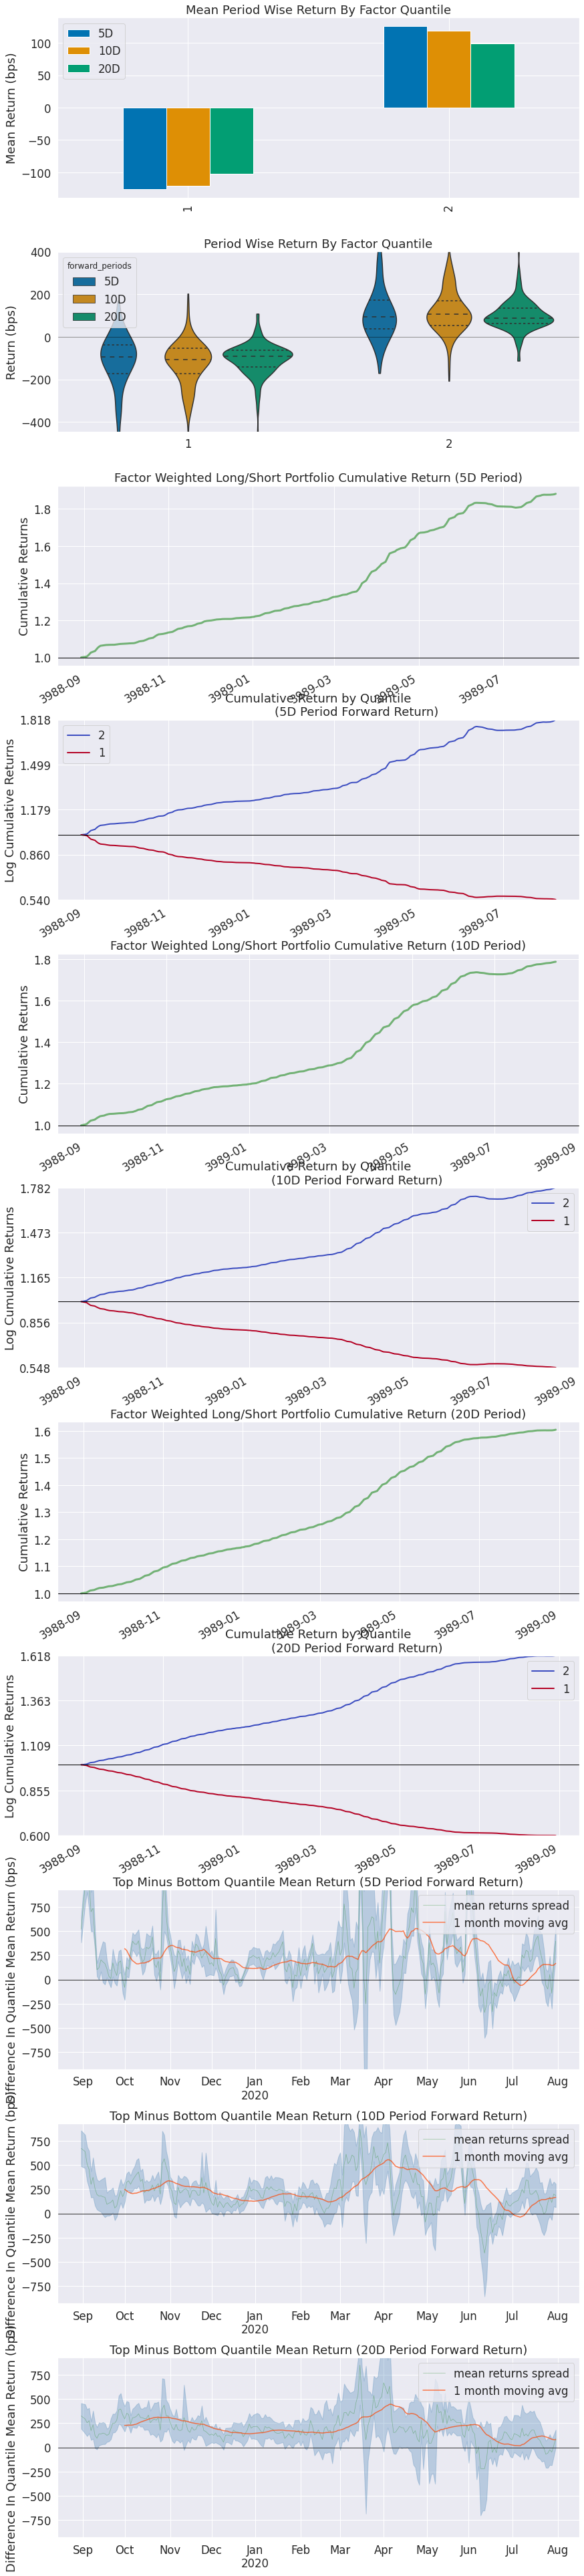

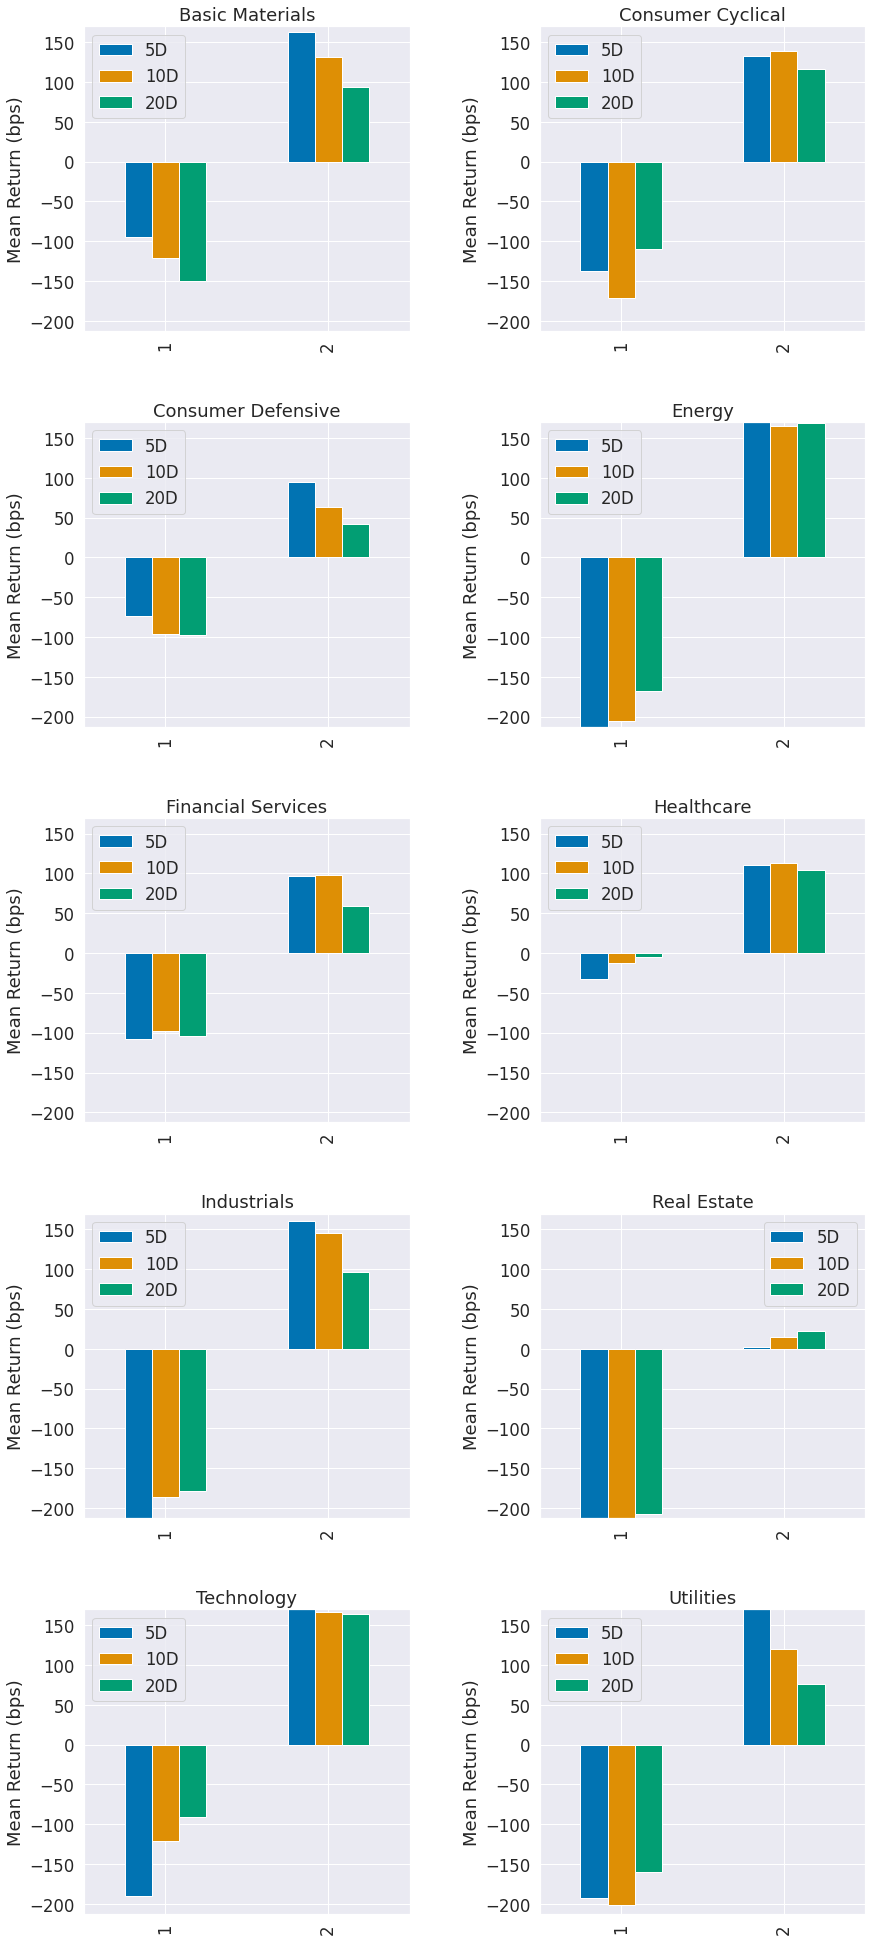

Information Analysis


5D     10D     20D
IC Mean            0.229   0.315   0.394
IC Std.            0.225   0.227   0.213
Risk-Adjusted IC   1.016   1.386   1.849
t-stat(IC)        15.475  21.117  28.160
p-value(IC)        0.000   0.000   0.000
IC Skew           -0.280  -0.498  -0.771
IC Kurtosis       -0.582  -0.593  -0.220

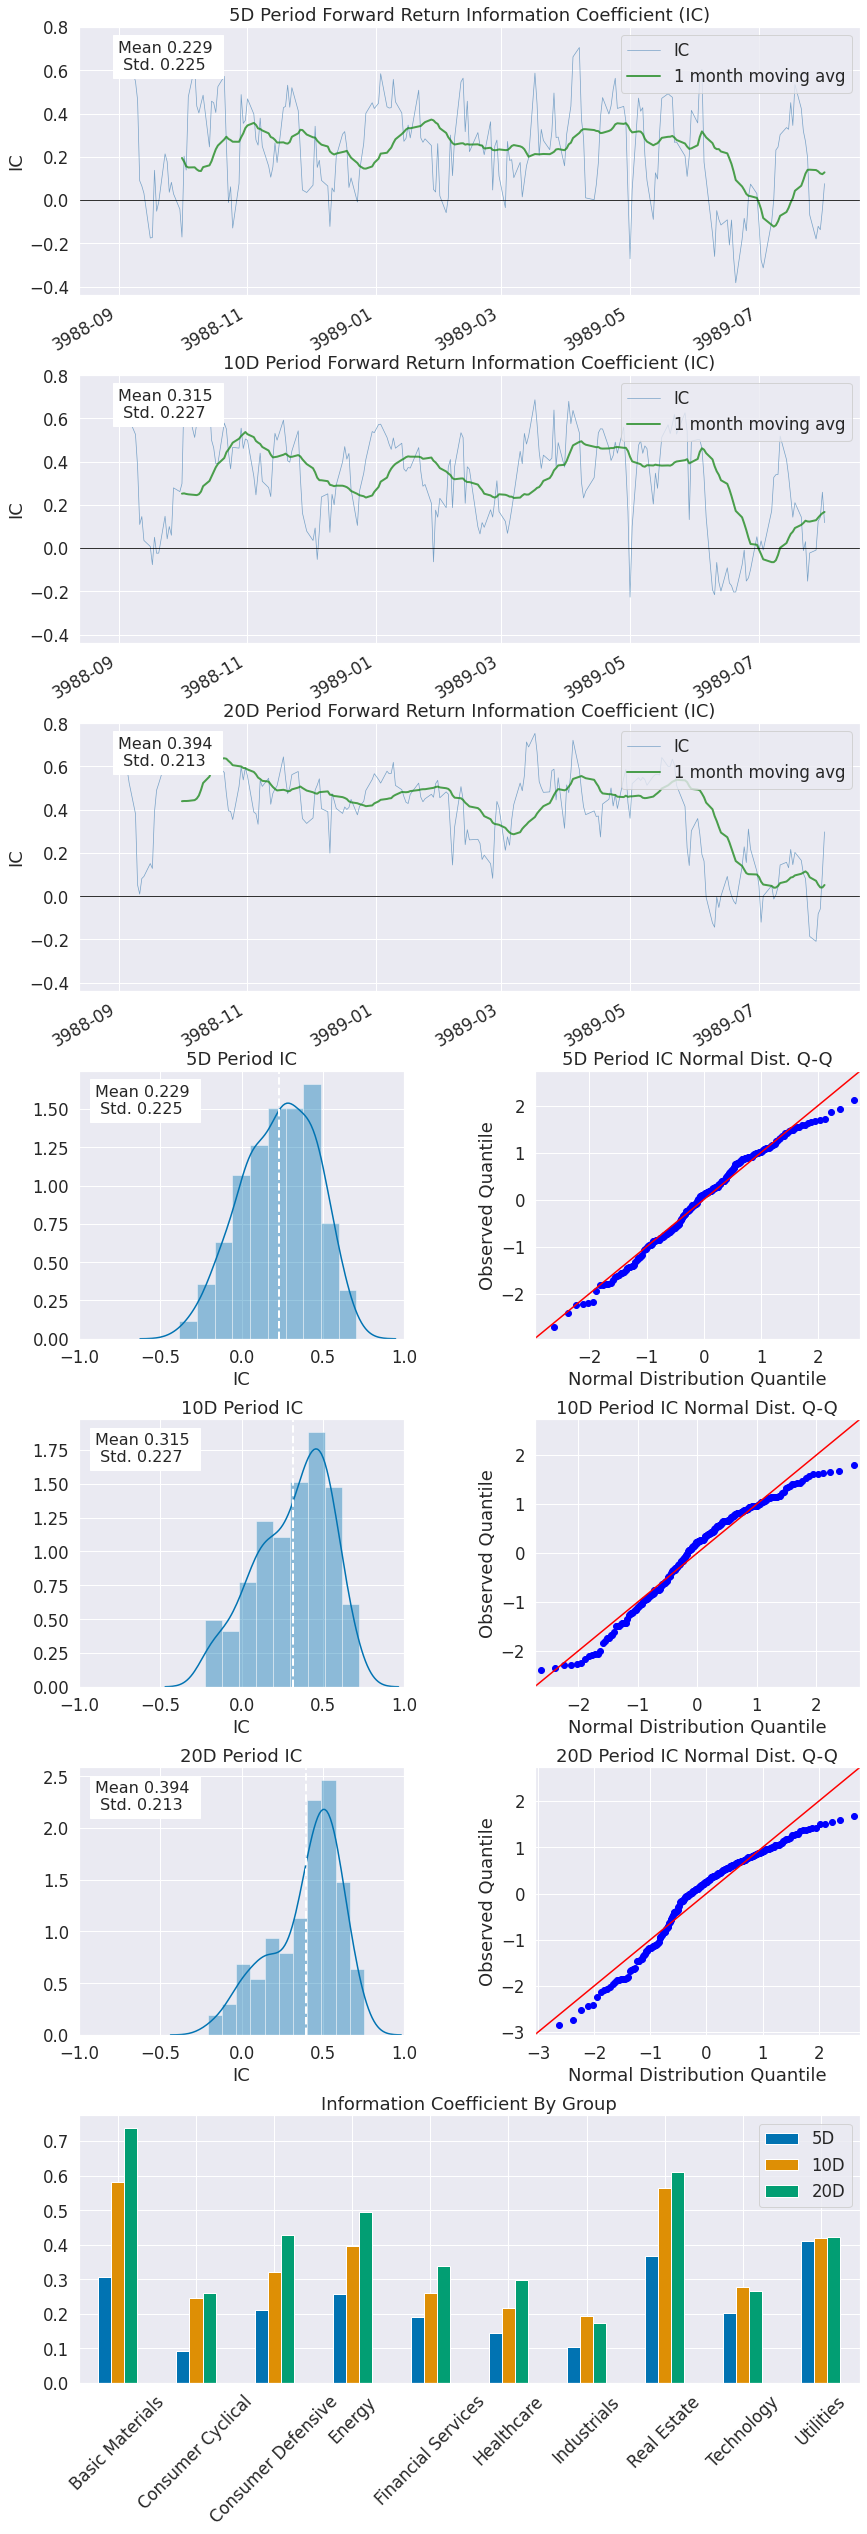

Turnover Analysis


10D    20D     5D
Quantile 1 Mean Turnover   0.564  0.739  0.394
Quantile 2 Mean Turnover   0.605  0.827  0.412

5D    10D    20D
Mean Factor Rank Autocorrelation  0.901  0.859  0.808

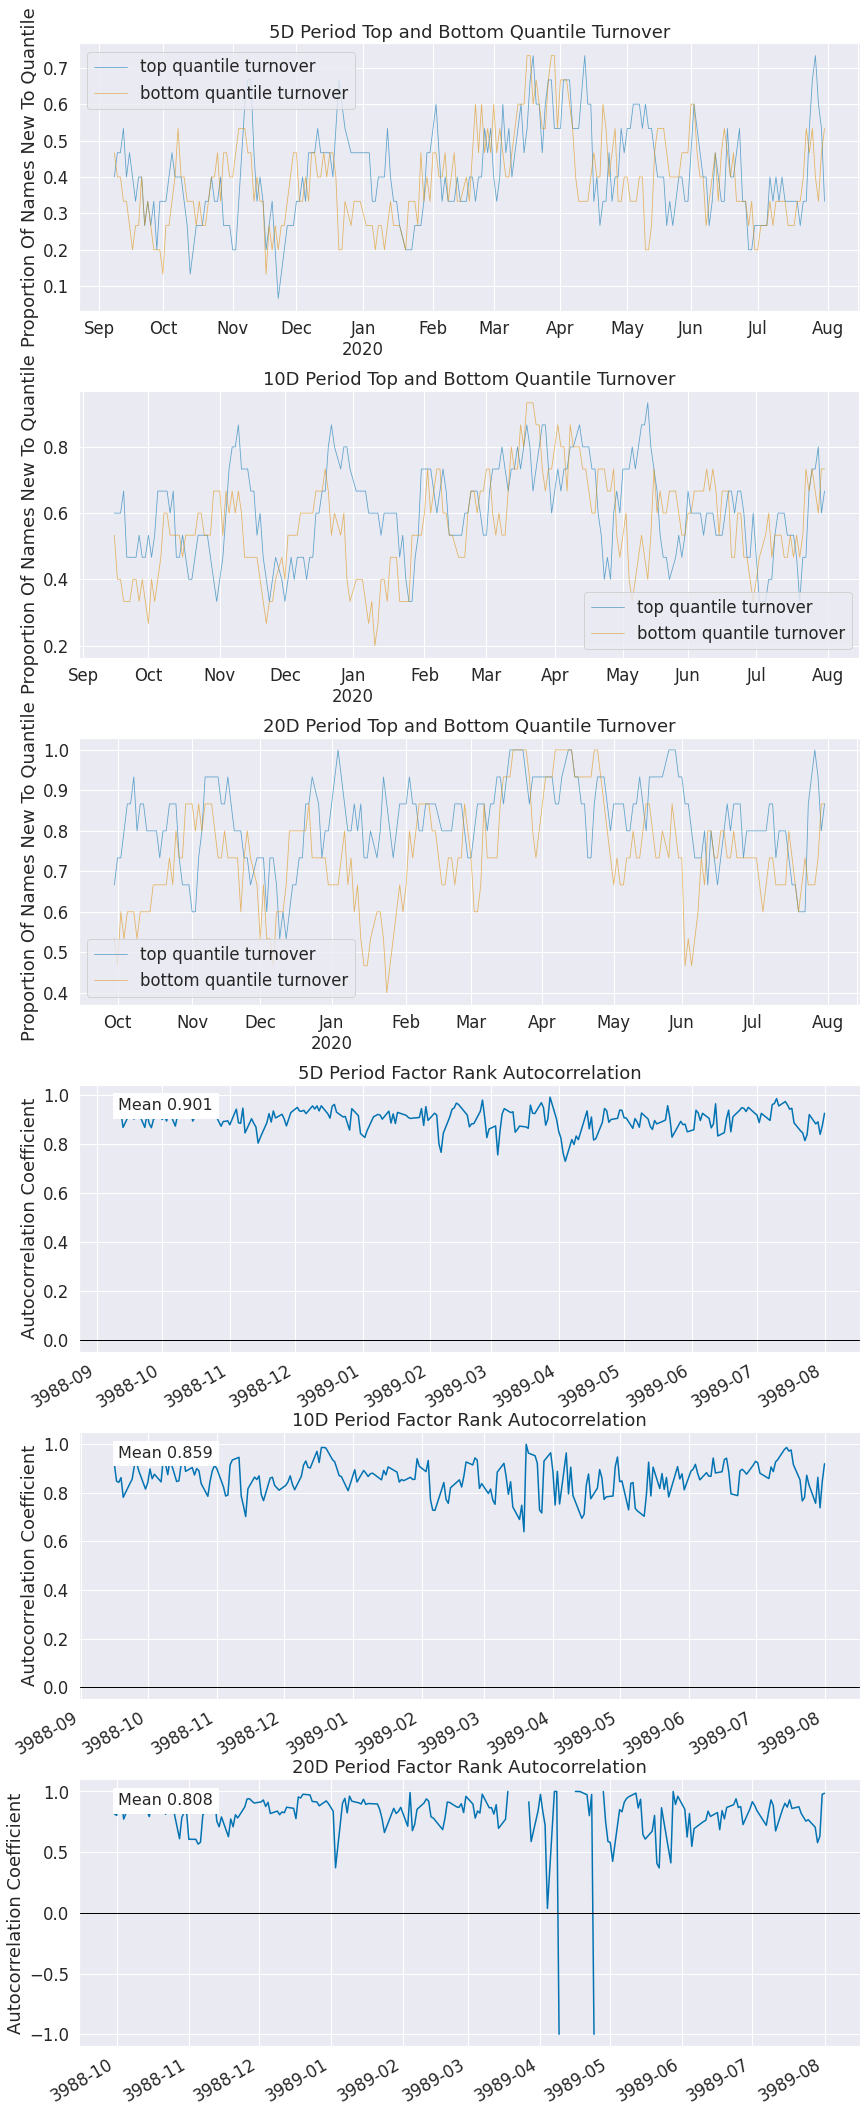

In [111]:
al.tears.create_full_tear_sheet(factor_data, by_group=True, long_short=True, group_neutral=False);

In [112]:
ls_factor_returns = al.performance.factor_returns(factor_data)

In [113]:
daily_annualization_factor = np.sqrt(252)
sharpe_ratio(ls_factor_returns, daily_annualization_factor).round(2)

5D     14.22
10D    19.10
20D    23.20
dtype: float64

# 10 - Predicted Portfolio

In [114]:
optimal_weights_regularized = final_vector[['optimal_weights']].loc[final_vector.index.levels[0][-1]]

for 30 assets  with end date: 2020-08-28 00:00:00+00:00


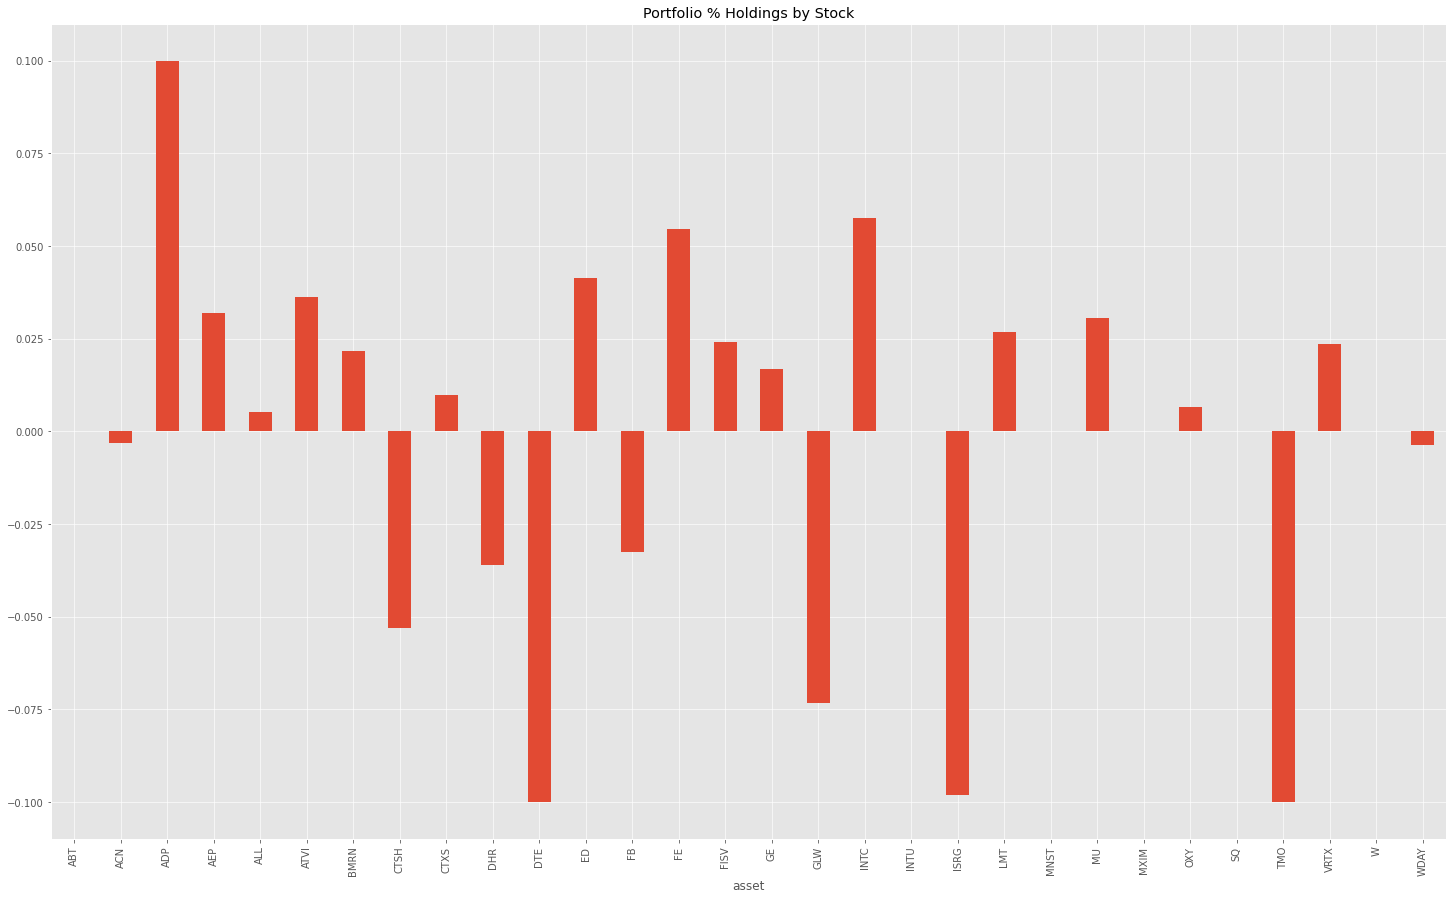

In [115]:
print ('for {} assets  with end date: {}'.format(len(optimal_weights_regularized.index),optimal.index[-1]))
optimal_weights_regularized.plot.bar(legend=None, title='Portfolio % Holdings by Stock')
plt.grid(alpha=0.8)

In [116]:
optimal_weights_regularized = pd.DataFrame(data = optimal_weights_regularized.values, 
                                           columns = ['optimal_weights'],
                                           index = optimal_weights_regularized.index)
optimal_weights_regularized.index.name = 'asset'

In [117]:
q5 = optimal_weights_regularized.sort_values(by='optimal_weights',ascending=False)[:len(optimal_weights_regularized.index)//5]
q1 = optimal_weights_regularized.sort_values(by='optimal_weights',ascending=True)[:len(optimal_weights_regularized.index)//5]

In [118]:
print (q5.iloc[0])
print (q1.iloc[0])

optimal_weights    0.1
Name: ADP, dtype: float64
optimal_weights   -0.1
Name: DTE, dtype: float64


## 10 - 1 - Risk analysis with optimized weights

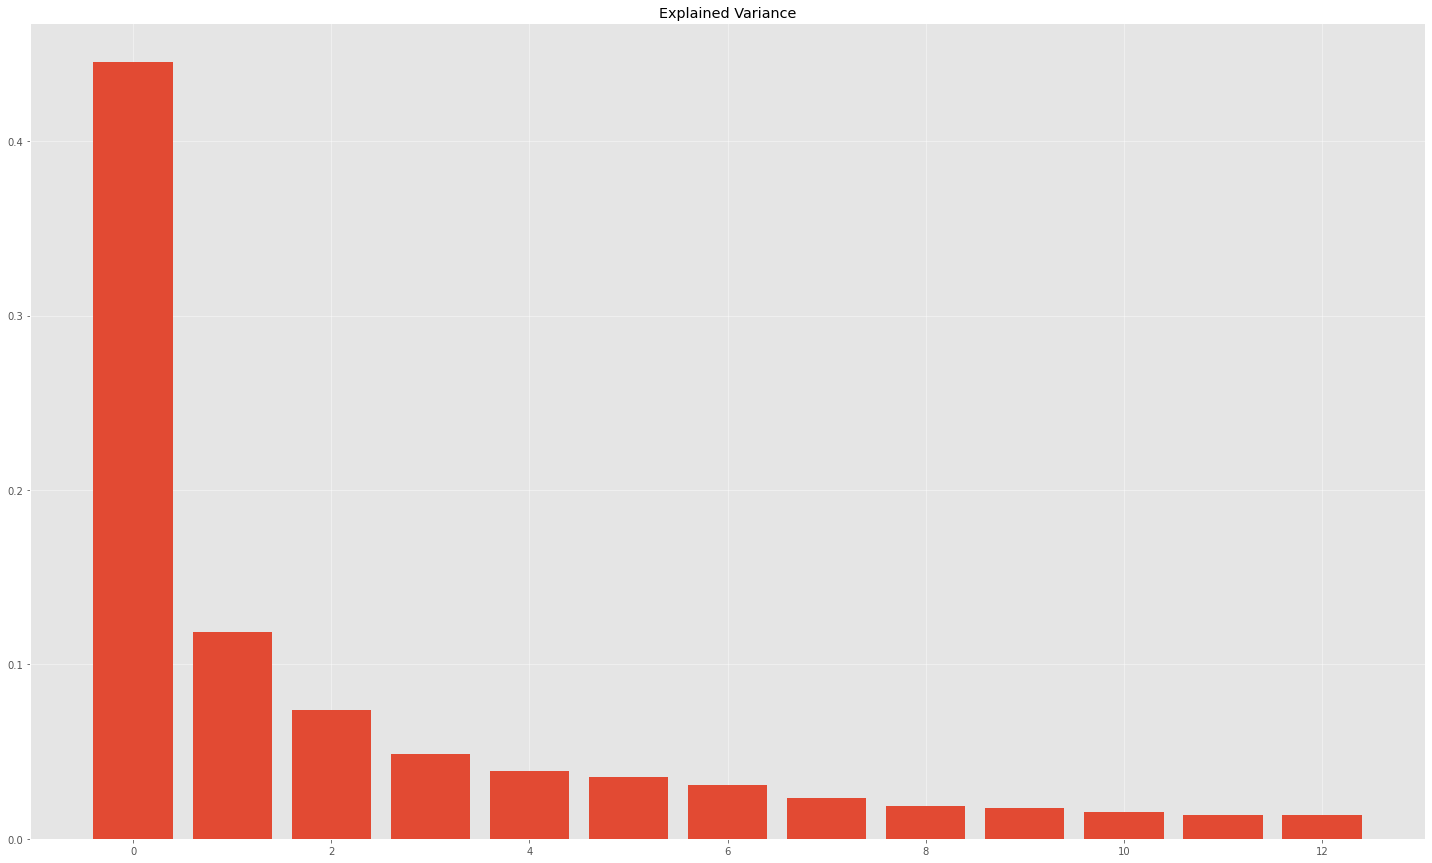

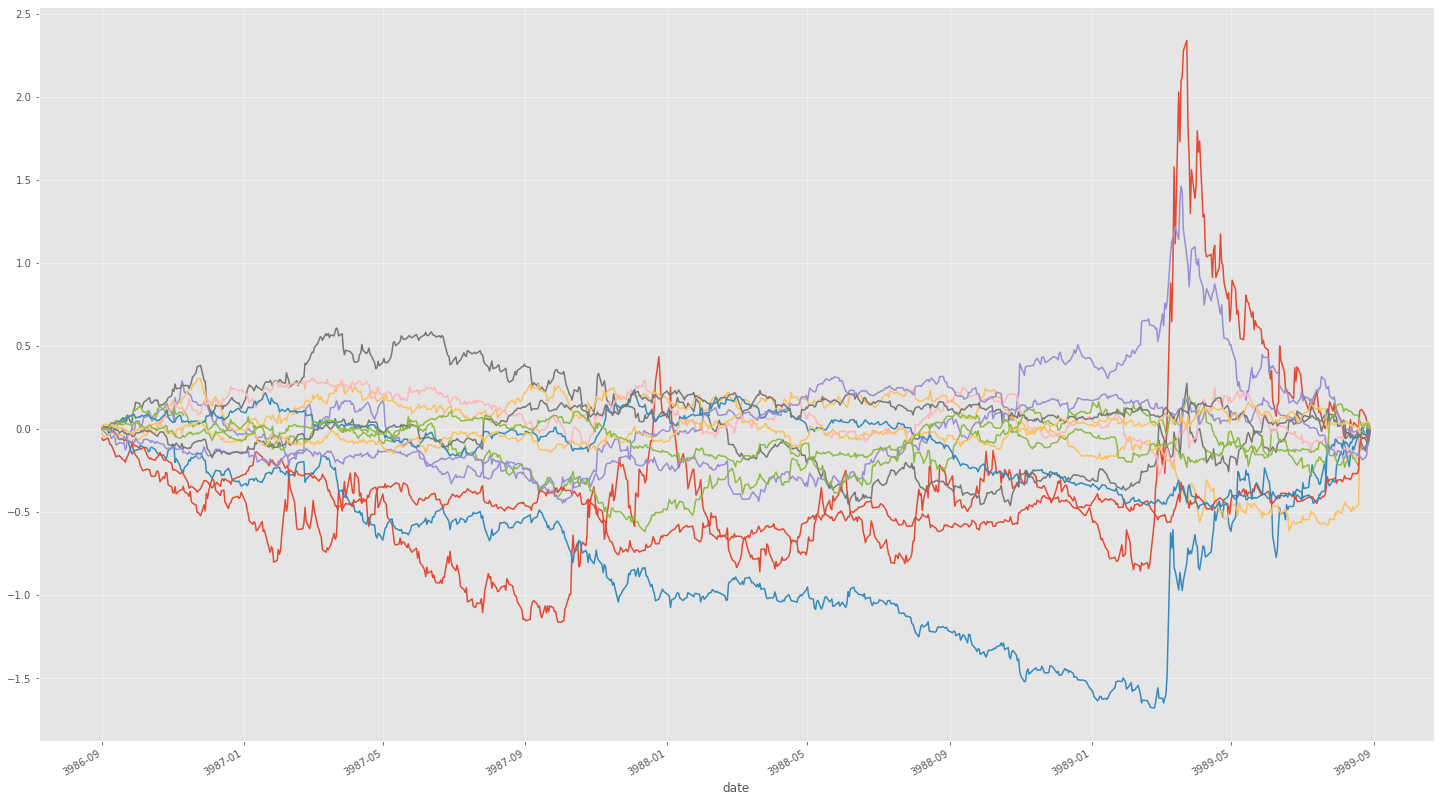

In [119]:
predicted_portfolio_risk,Risk_Model = RM().portfolio_risk(close[optimal_weights_regularized.index],num_factor_exposures=factor_exposures,weights=optimal_weights_regularized)

In [120]:
print ('Predicted Risk: {} %'.format(np.round((predicted_portfolio_risk*100),2)))

Predicted Risk: 5.99 %


In [121]:
close.to_csv('data/close.csv')
optimal_weights_regularized.to_csv('output/optimal_weights_regularized.csv')

In [122]:
print ('the total leverage is {}'.format(optimal_weights_regularized.abs().sum().round(2)[0]))
print ('the long/short leverage balance is {}'.format(optimal_weights_regularized.sum().round(2)[0]))

the total leverage is 0.99
the long/short leverage balance is -0.01


In [123]:
import vlc
p = vlc.MediaPlayer("End_of_Script.mp3")
p.play();